In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("data/churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understand the Data

In [4]:
df.shape

(7043, 21)

In [5]:
print(df.isnull().sum())
print("############################")
print(df.describe())
print("############################")
print(df.duplicated().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
############################
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
############################
0


### Data Cleaning 

In [6]:
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(how='any', inplace=True)


In [9]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [10]:
df['tenure'].max()


np.int64(72)

In [11]:
# group tenure into bins of 12 months and assign labels to these groups
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)

In [12]:
df['tenure_group'].value_counts()


tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [13]:
# drop unnecessary columns
df.drop(columns=['customerID'], axis=1 ,inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
837,Male,0,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,44.40,44.40,Yes,1 - 12
88,Female,0,Yes,Yes,46,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.95,927.10,No,37 - 48
800,Female,1,Yes,No,70,Yes,Yes,Fiber optic,No,No,...,No,No,No,Two year,Yes,Credit card (automatic),75.65,5411.40,No,61 - 72
4961,Male,0,Yes,No,18,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.35,768.05,No,13 - 24
1167,Male,0,No,No,26,Yes,Yes,DSL,No,No,...,No,No,No,One year,Yes,Credit card (automatic),51.55,1295.40,No,25 - 36


### Data Exploration

In [14]:
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

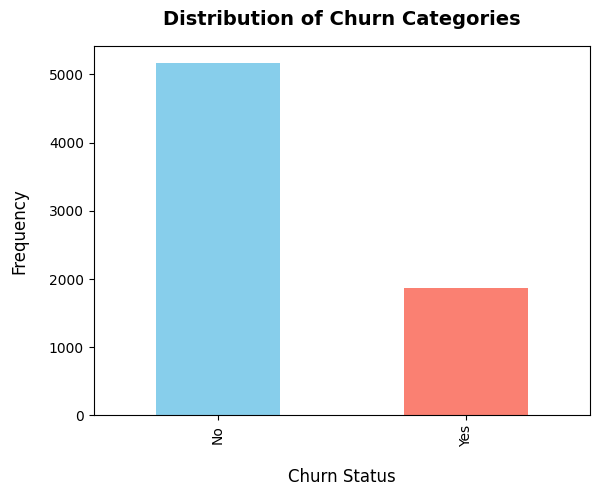

In [15]:
# visulaizing the distribution of churn variable
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Frequency', fontsize=12, labelpad=15)
plt.xlabel('Churn Status', fontsize=12, labelpad=15)
plt.title('Distribution of Churn Categories', fontsize=14, fontweight='bold', pad=15)
plt.show()


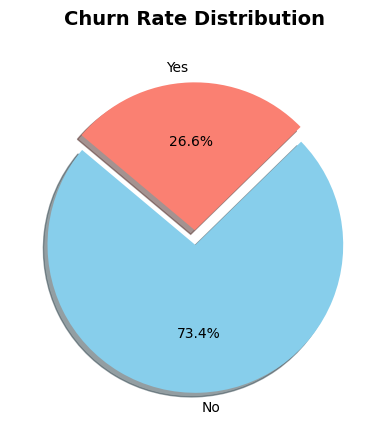

In [16]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140 ,explode=(0.1,0), shadow=True, colors=['skyblue', 'salmon'])
plt.ylabel("")
plt.title("Churn Rate Distribution", fontsize=14, fontweight='bold', pad=15)
plt.show()

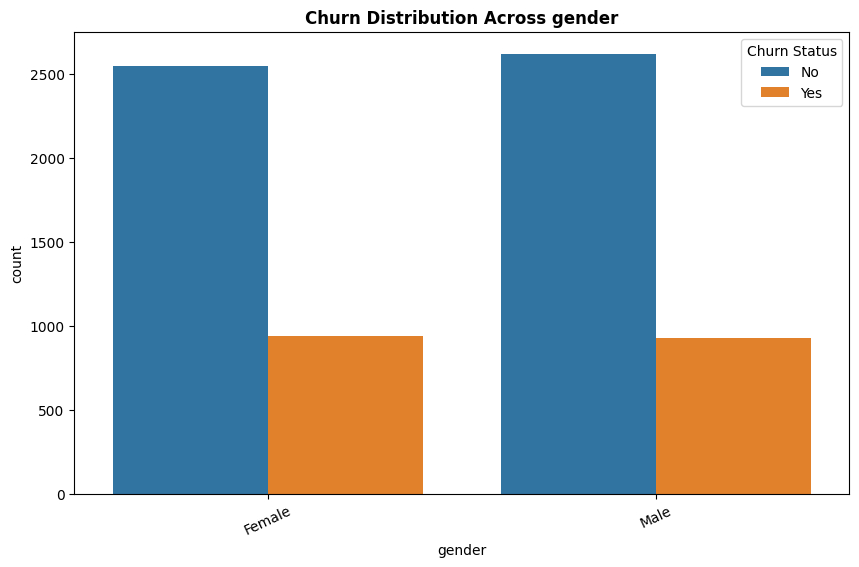

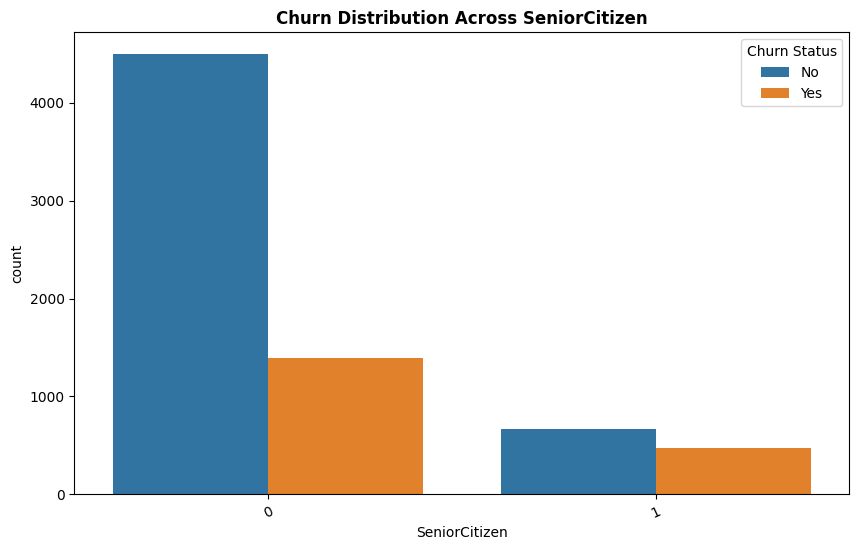

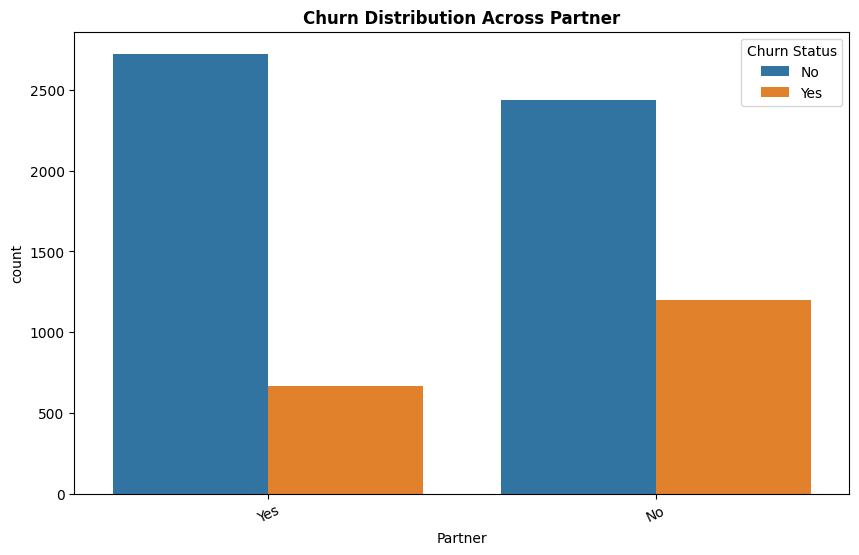

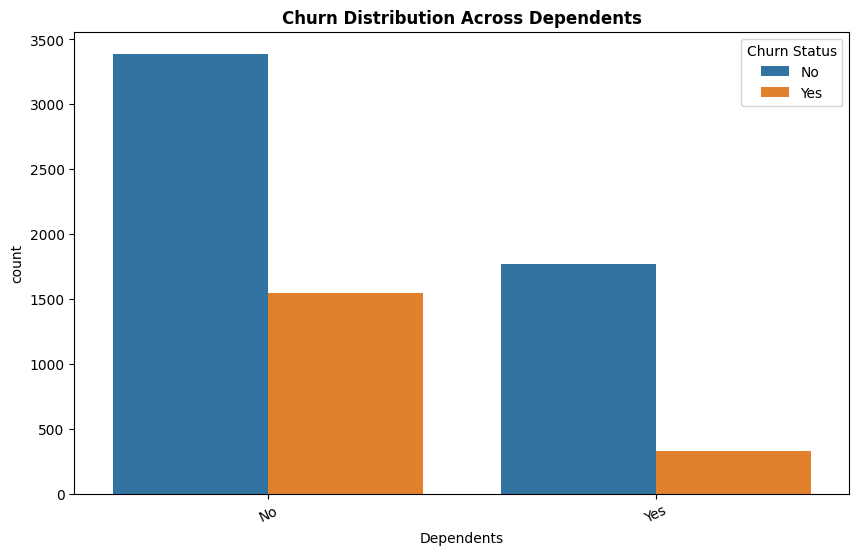

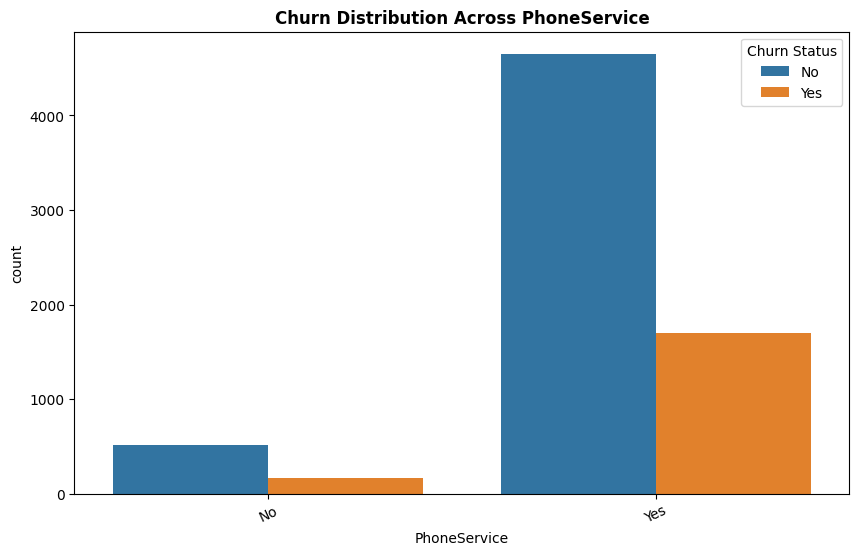

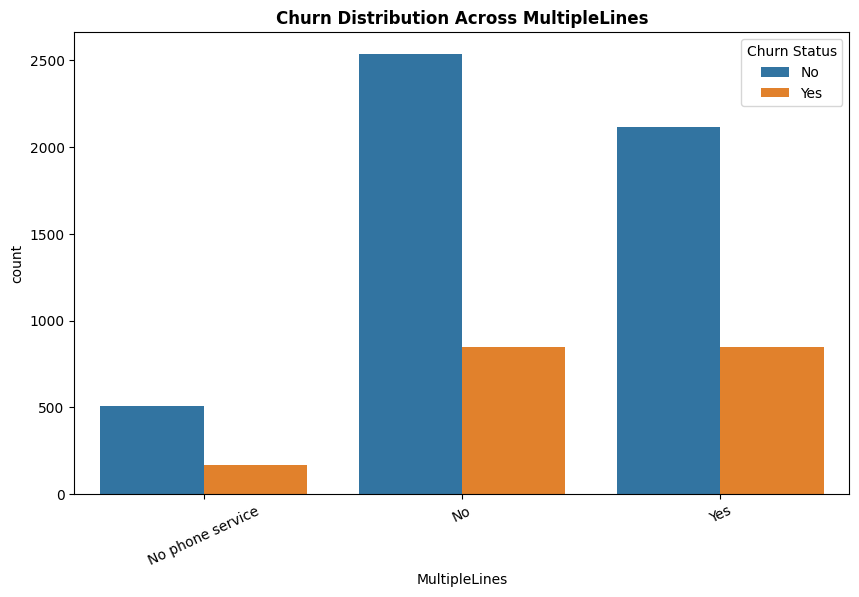

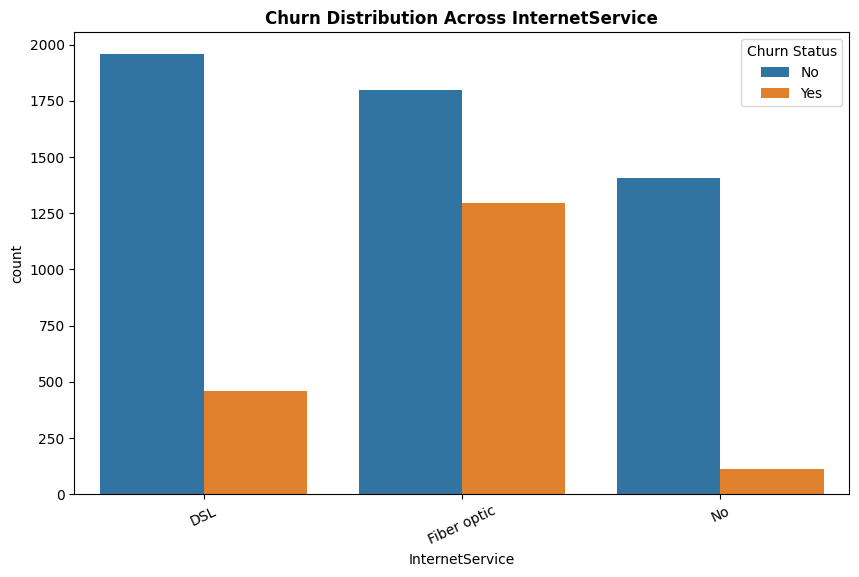

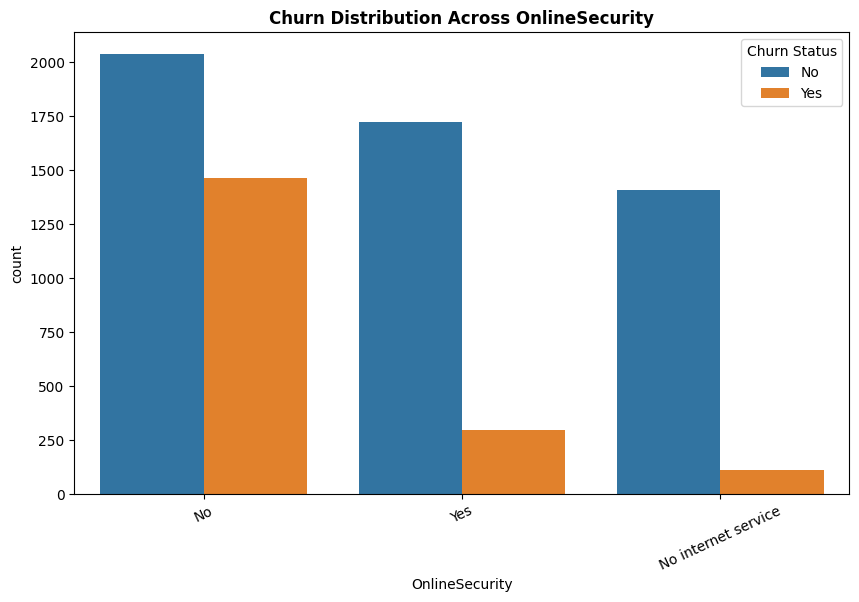

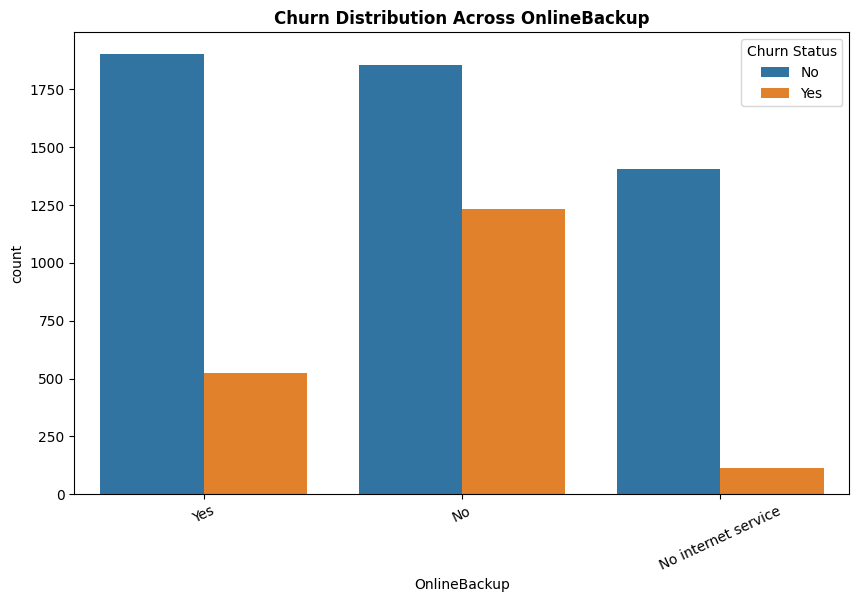

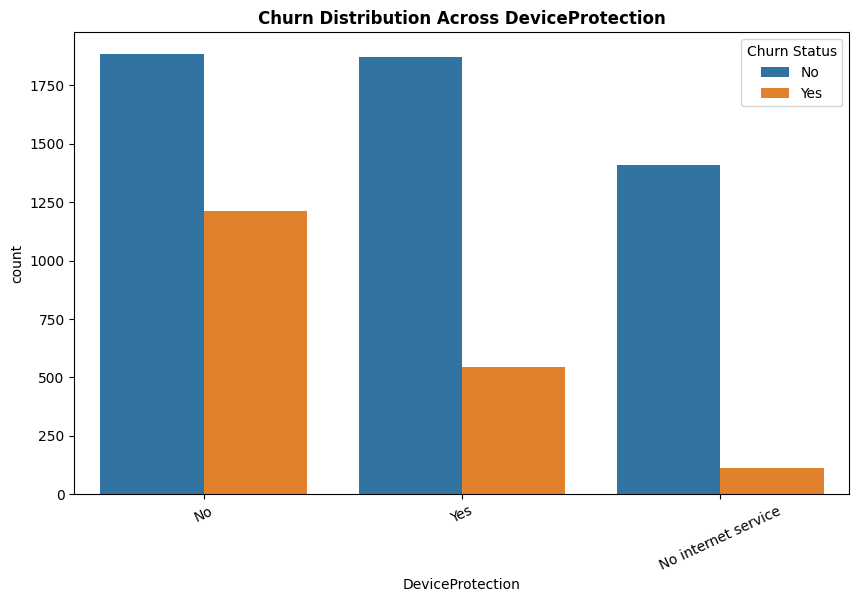

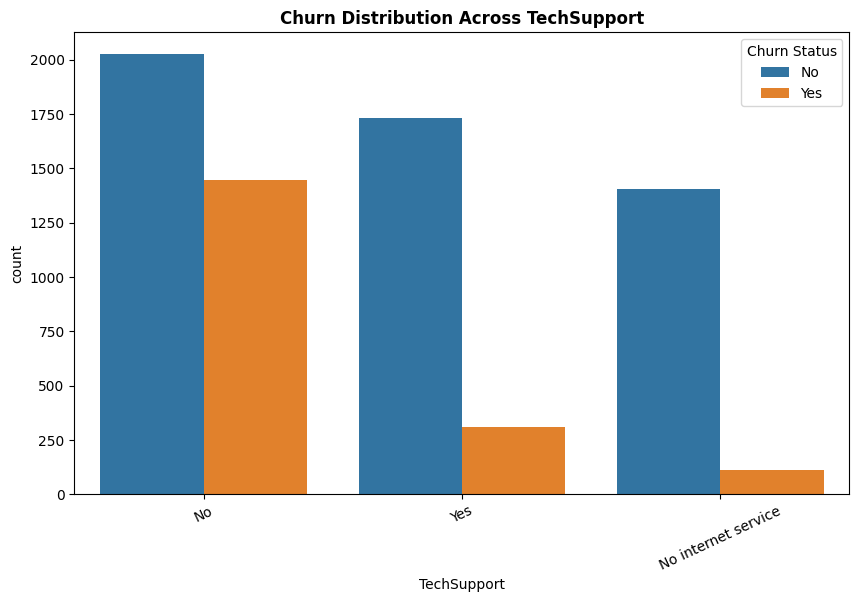

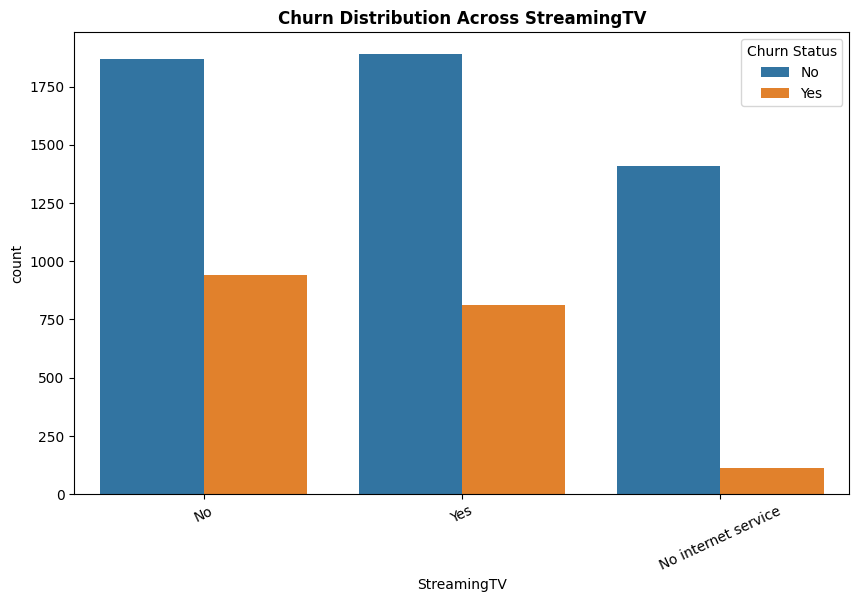

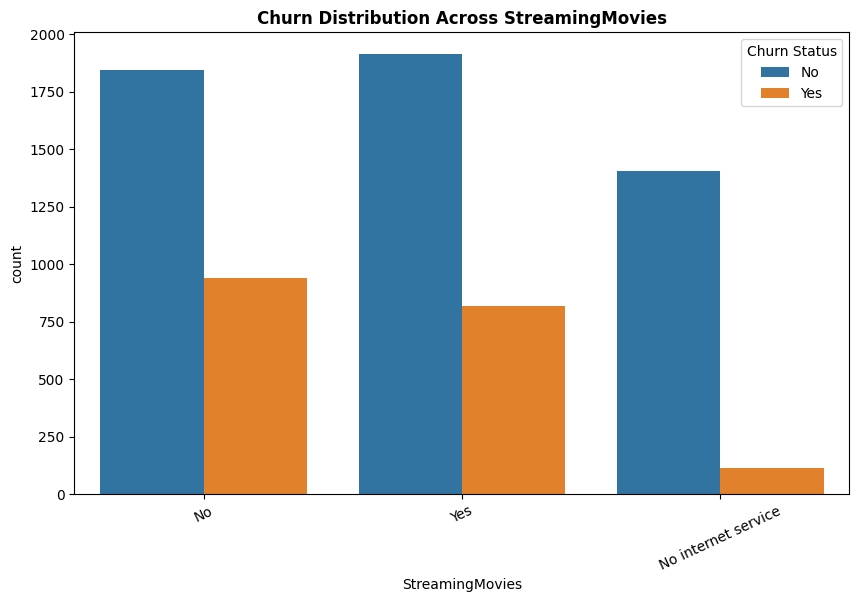

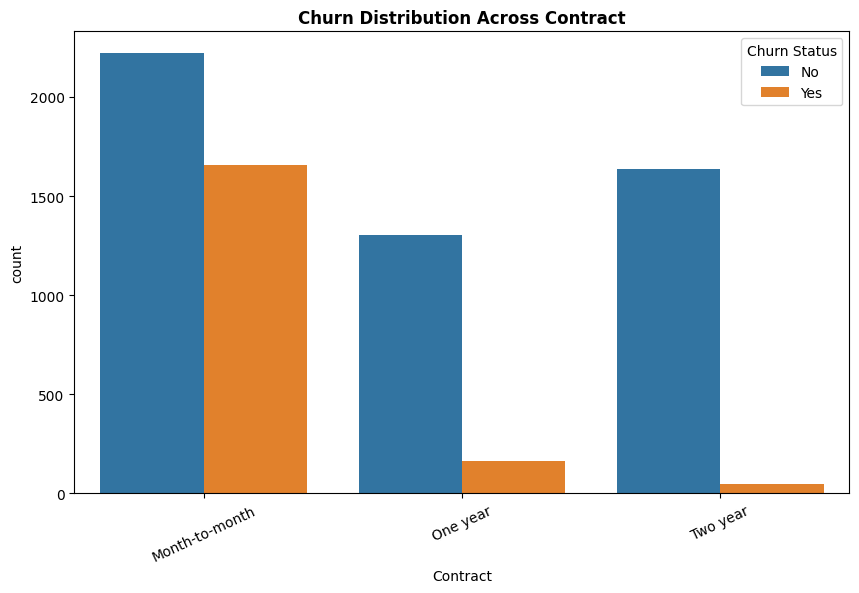

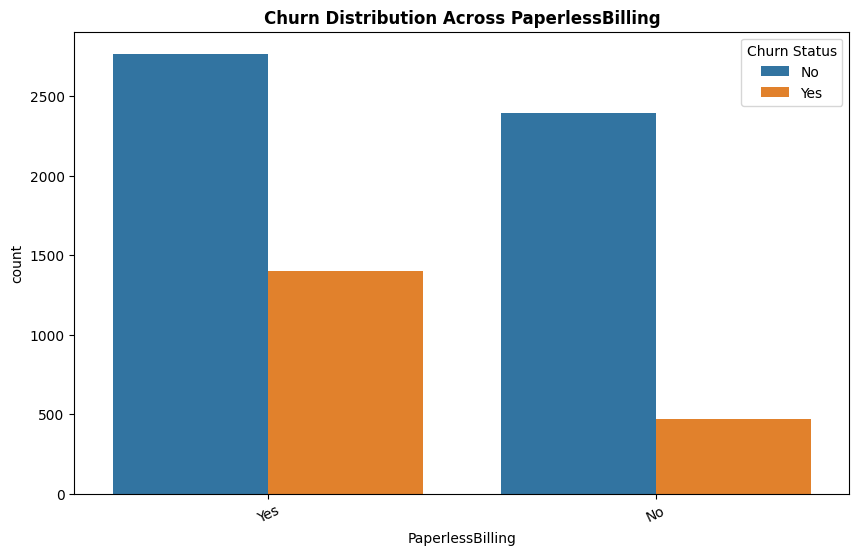

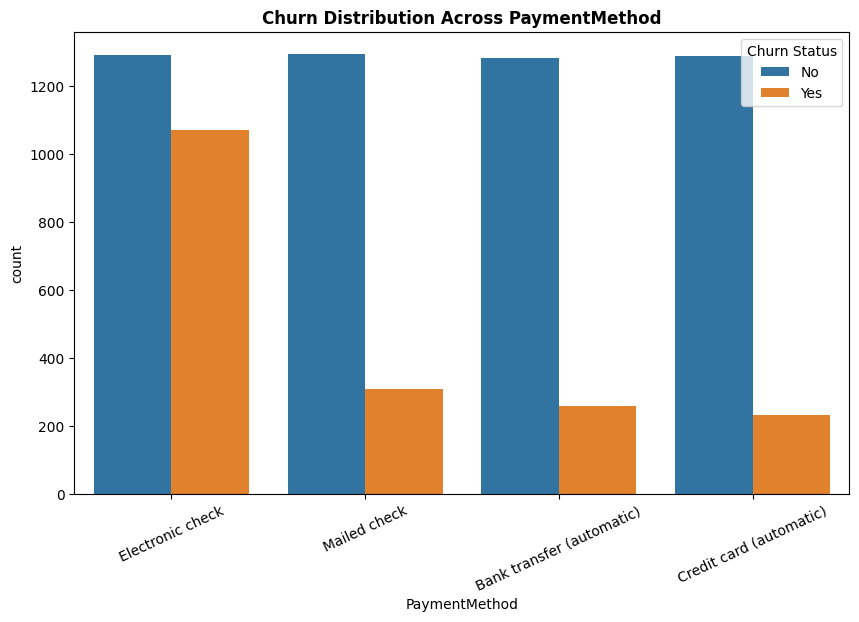

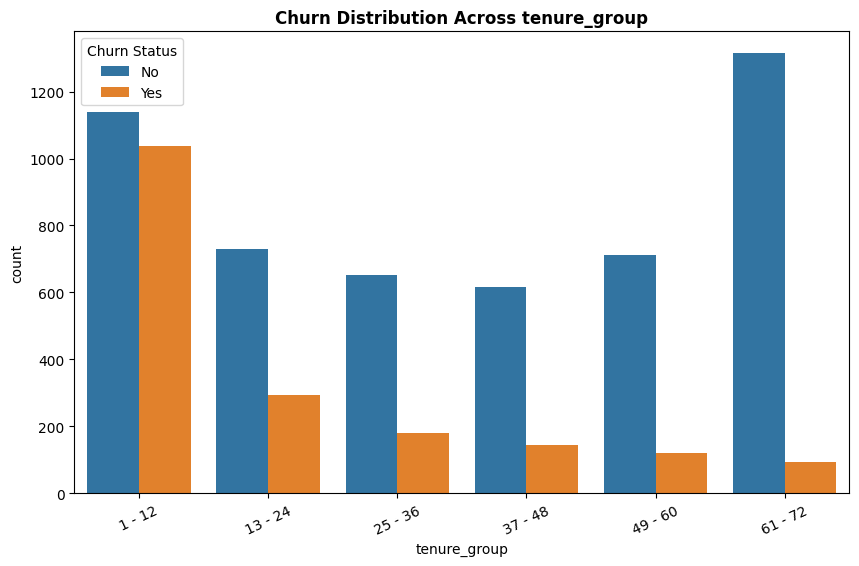

In [17]:
# visualizing the distribution of each categorical feature with respect to churn
for idx, feature in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(idx, figsize=(10,6))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f"Churn Distribution Across {feature}", fontweight='bold')
    plt.xticks(rotation=25)
    plt.legend(title='Churn Status')
    plt.show()
    print("\n\n")

### Univariate Analysis:

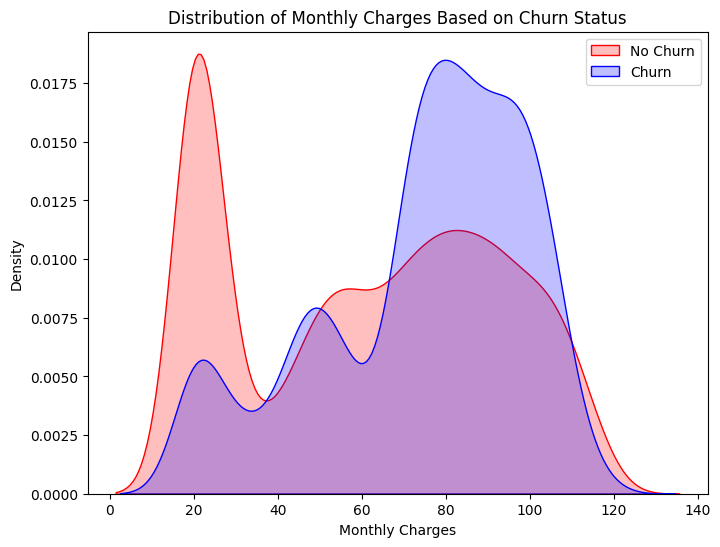

In [18]:
# visualizing the distribution of Monthly Charges for churned and non-churned customers
plt.figure(figsize=(8,6))
sns.kdeplot(df[df["Churn"]=='No']['MonthlyCharges'], shade=True, color='red', label="No Churn")
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], shade=True, color='blue', label="Churn")
plt.legend(loc='upper right')
plt.xlabel("Monthly Charges")
plt.title('Distribution of Monthly Charges Based on Churn Status')
plt.show()


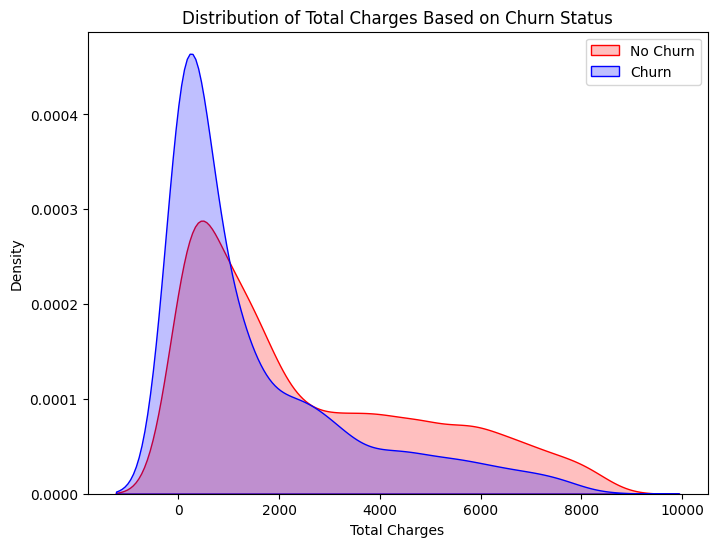

In [19]:
# visualizing the distribution of Total Charges for churned and non-churned customers
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['Churn']=='No']['TotalCharges'], shade=True, color='red', label="No Churn")
sns.kdeplot(df[df['Churn']=='Yes']['TotalCharges'], shade=True, color='blue', label='Churn')
plt.legend(loc='upper right')
plt.xlabel('Total Charges')
plt.title("Distribution of Total Charges Based on Churn Status")
plt.show()

### Bivariate Analysis

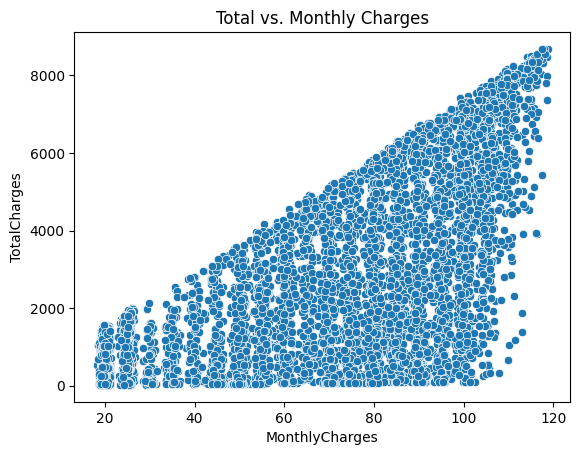

In [20]:
# Relation berween Monthly Charges and Total Charges
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges')
plt.title("Total vs. Monthly Charges")
plt.show()

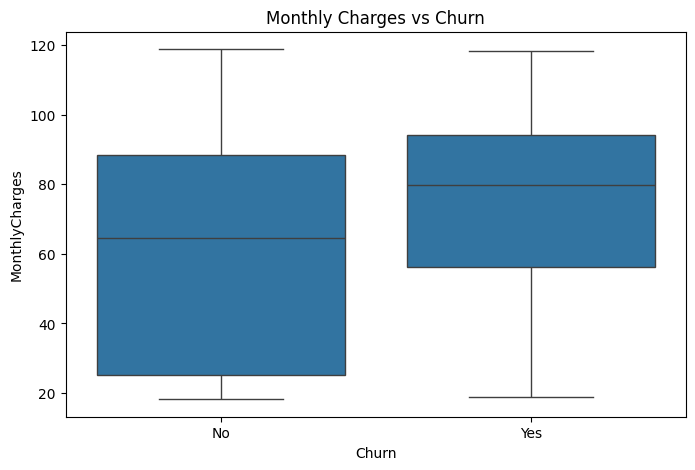

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x="Churn", y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

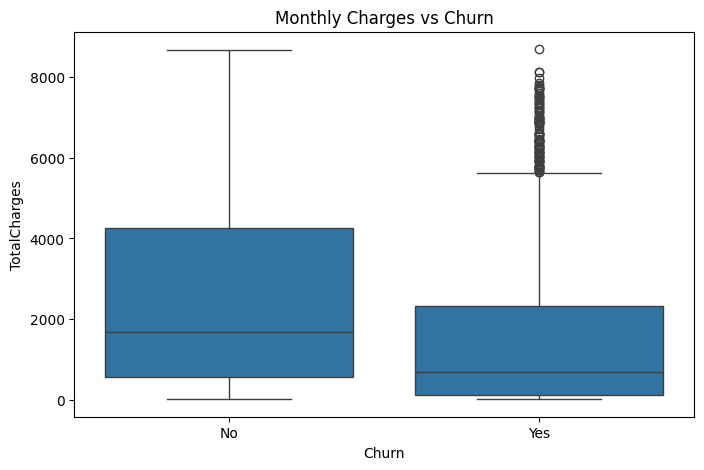

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x="Churn", y='TotalCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

In [23]:
# spliting data based on churn status
churn_yes = df[df["Churn"]=='Yes']
churn_no = df[df["Churn"]=='No']

In [24]:
# custom plotng fucntion for categorical variables
def custom_plot(data, feature, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams.update({'axes.labelsize':17, 'axes.titlesize':19, 'axes.titlepad':23})

    feature_unique_count = data[feature].nunique()
    hue_unique_count = data[hue].nunique() if hue else 0
    width = feature_unique_count + 7 + 4 * hue_unique_count
    
    fig, ax = plt.subplots(figsize=(width, 8))

    plt.xticks(rotation=25)
    plt.yscale('log')
    plt.title(title, fontweight='bold')

    sns.countplot(data=data, x=feature, hue=hue, order=data[feature].value_counts().index, palette='Set2', ax=ax)
    plt.show()

In [25]:
df.columns.values


array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

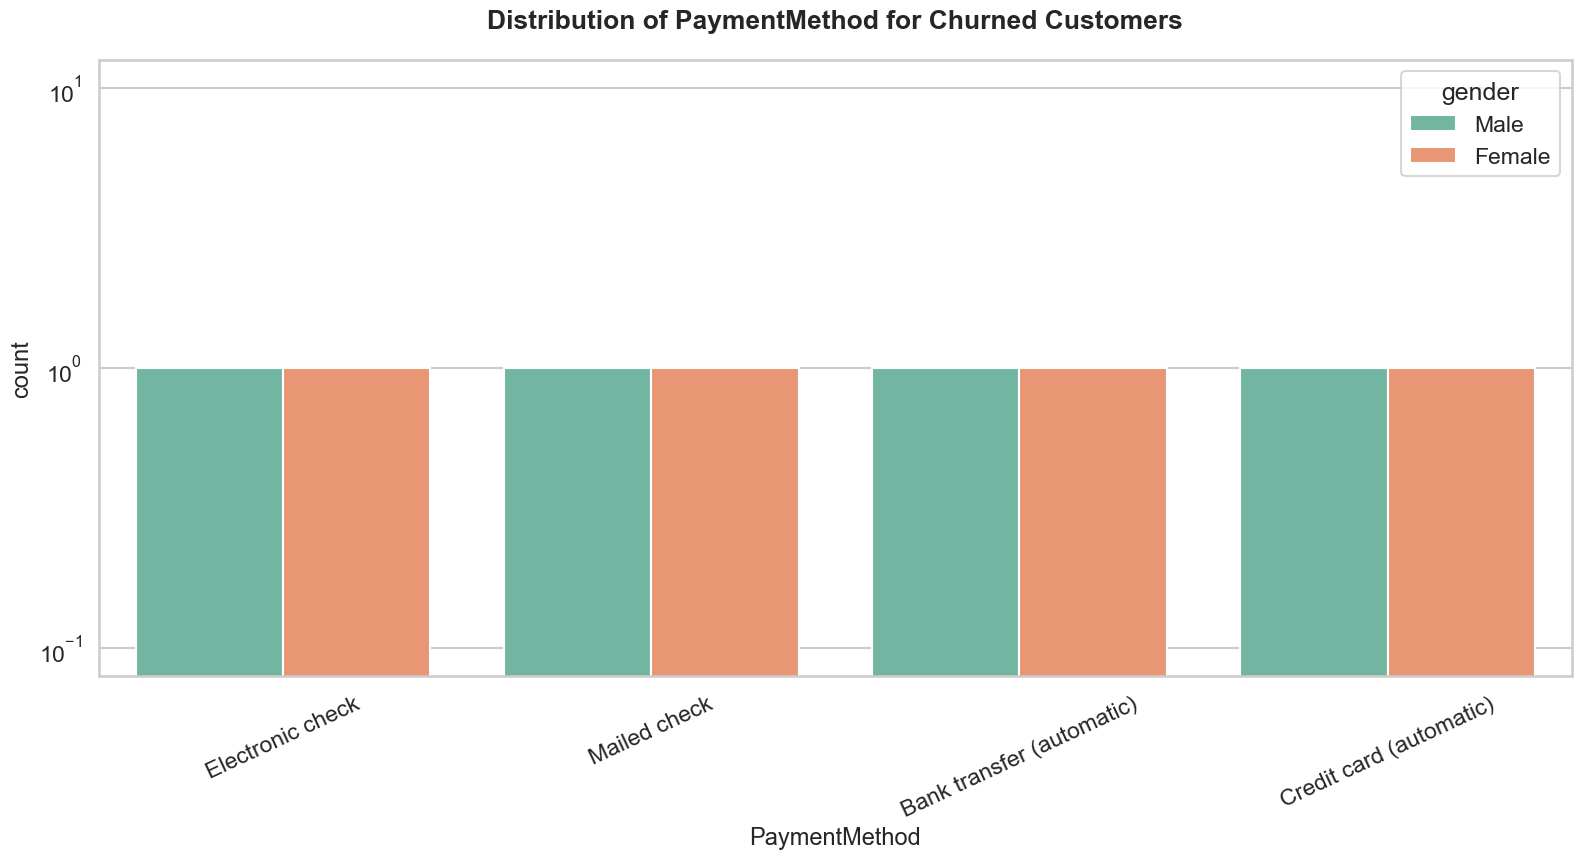

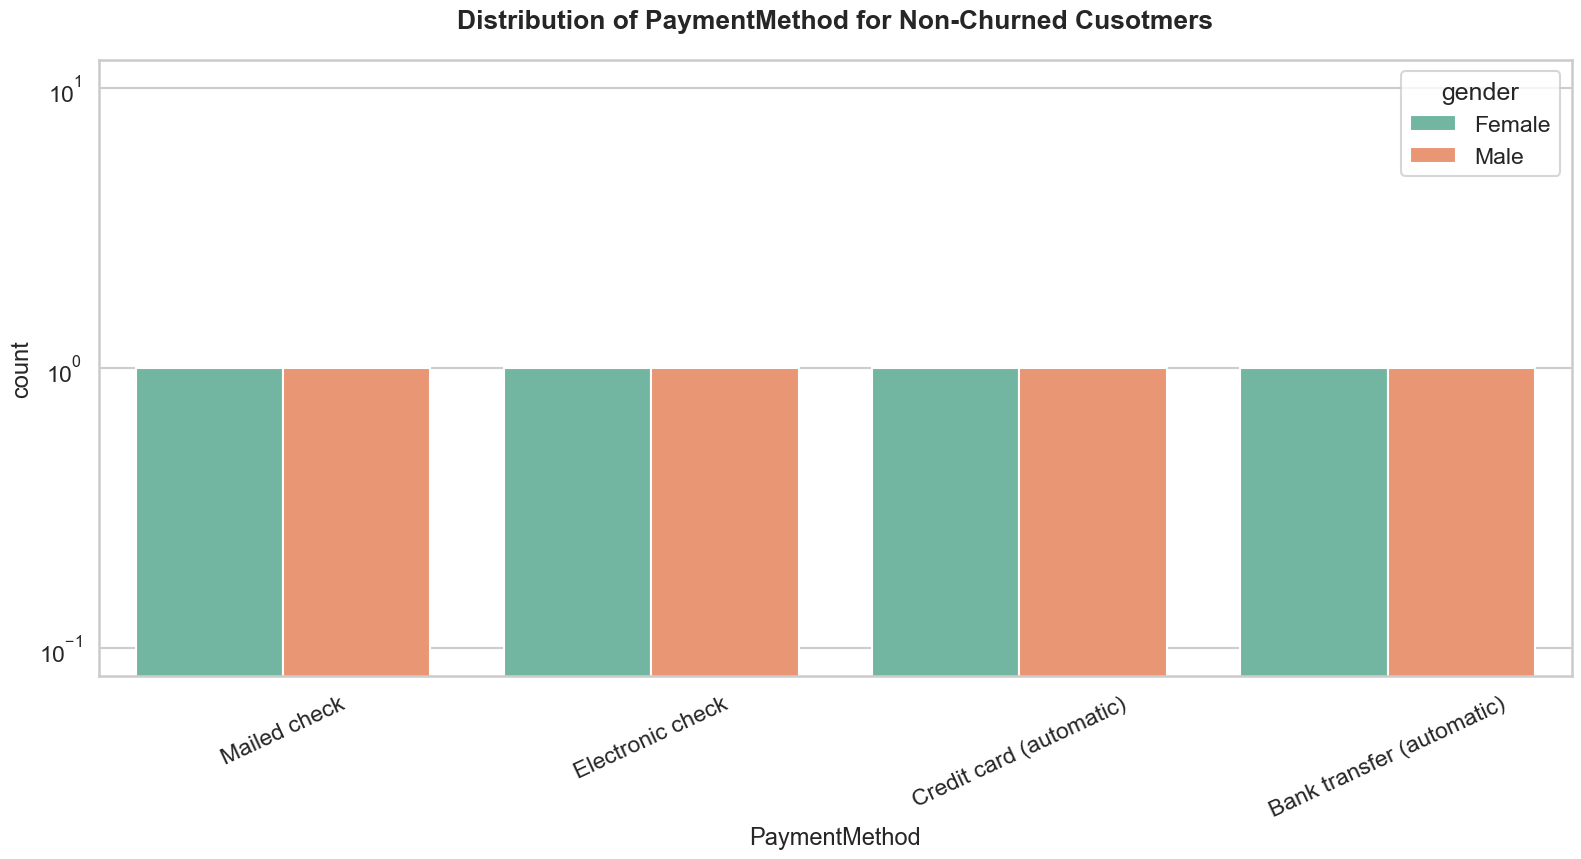

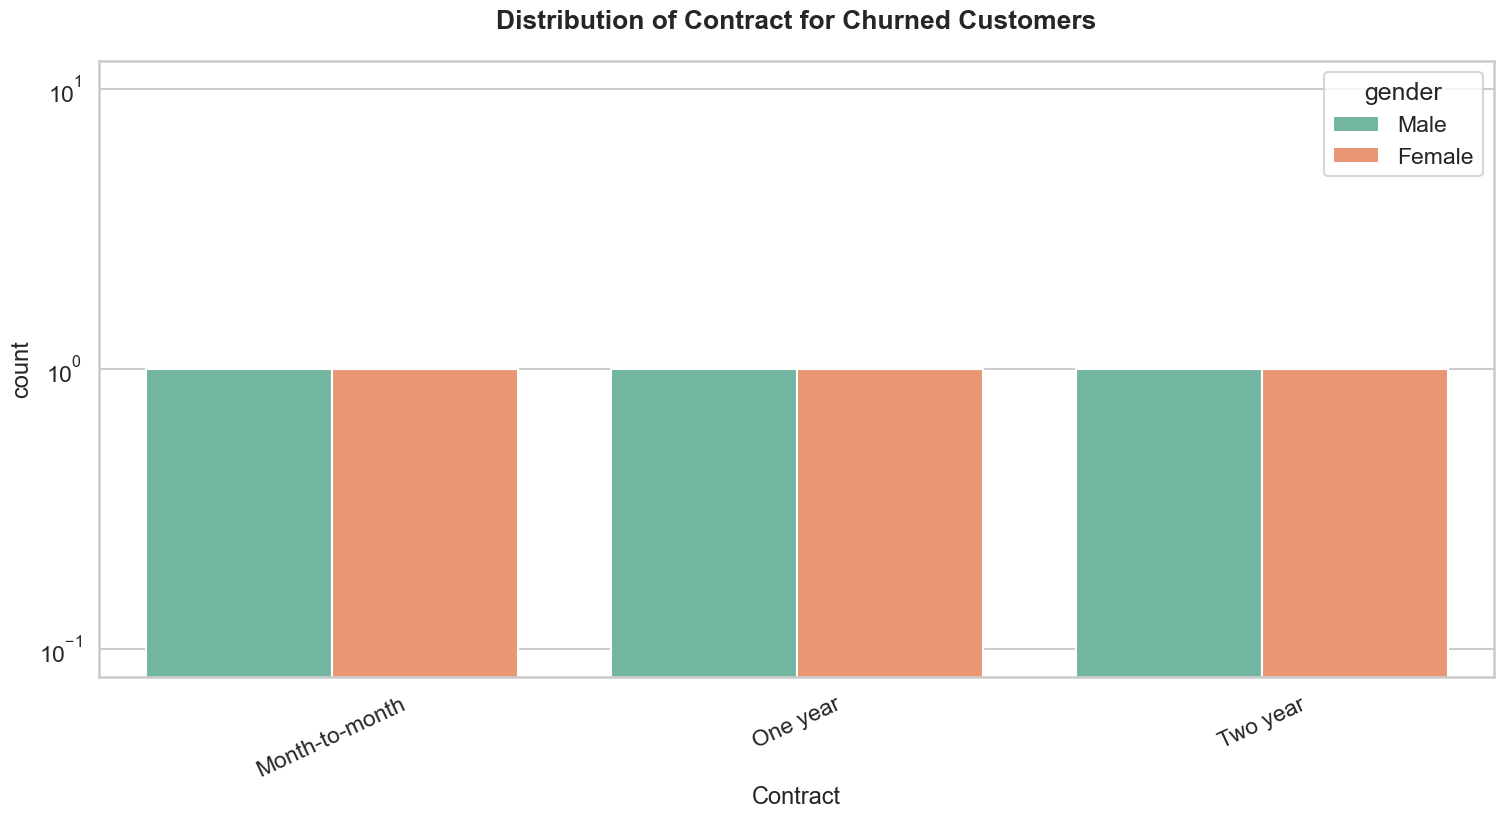

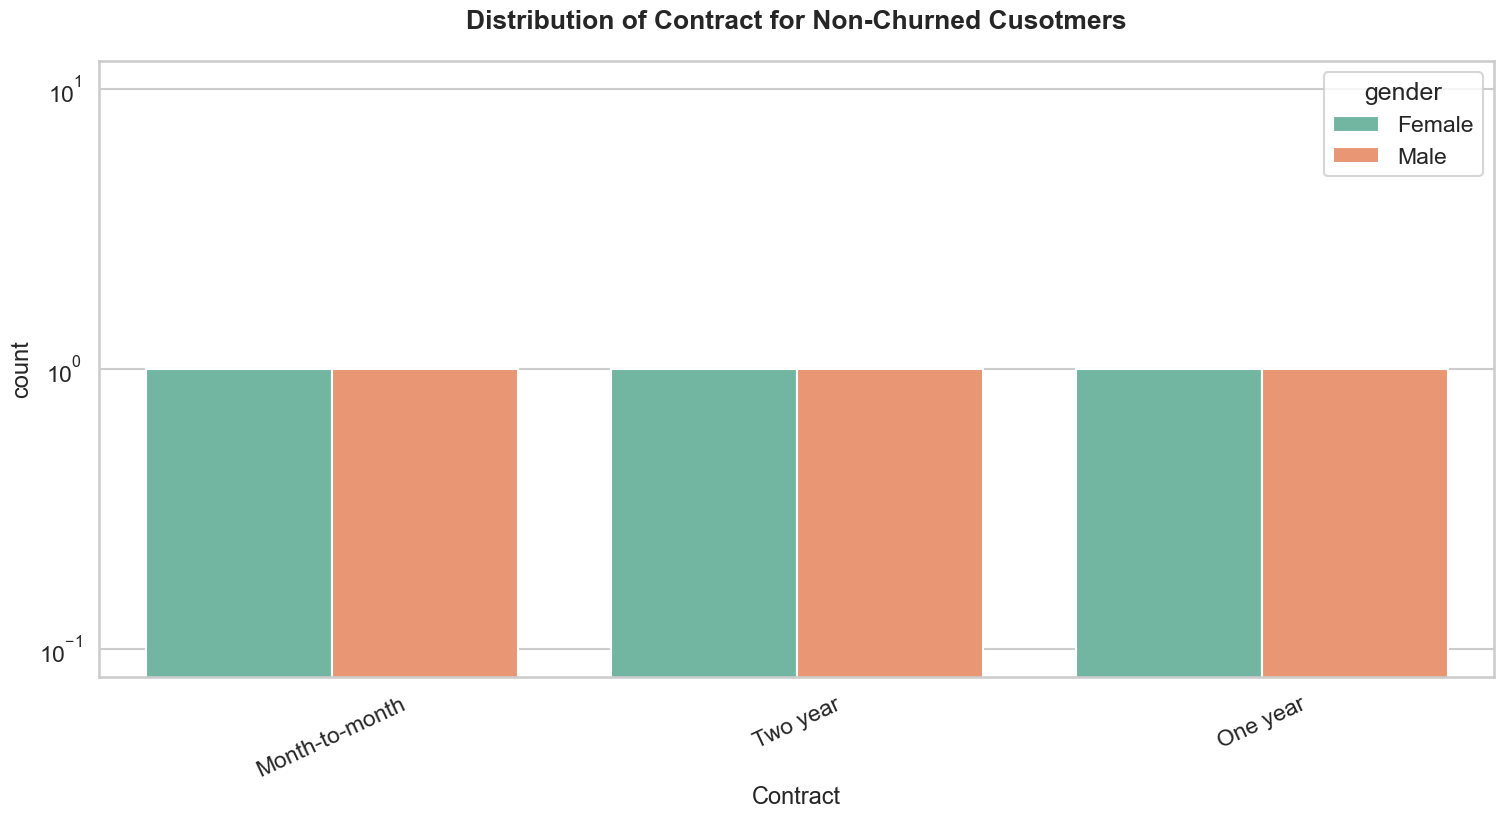

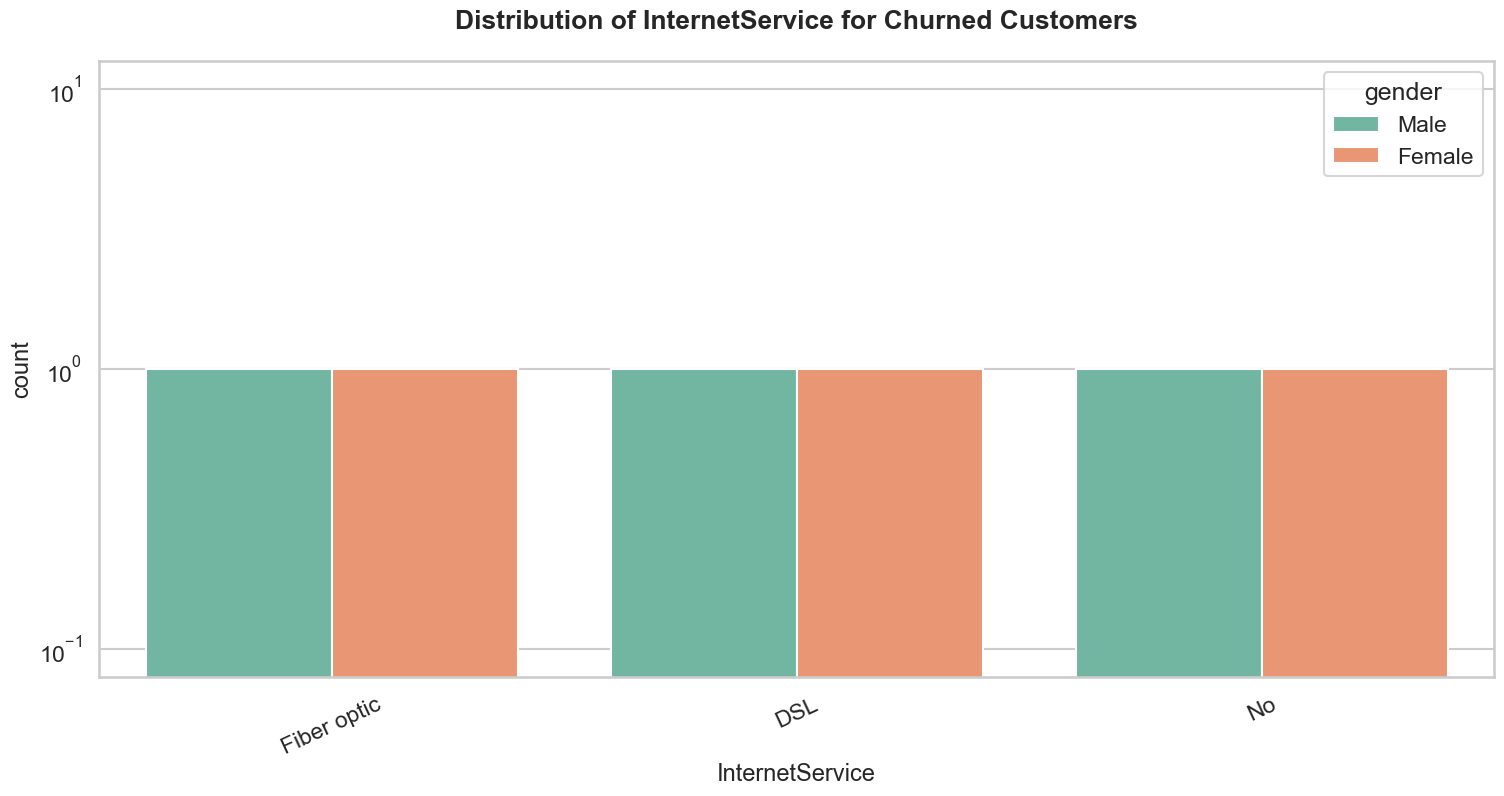

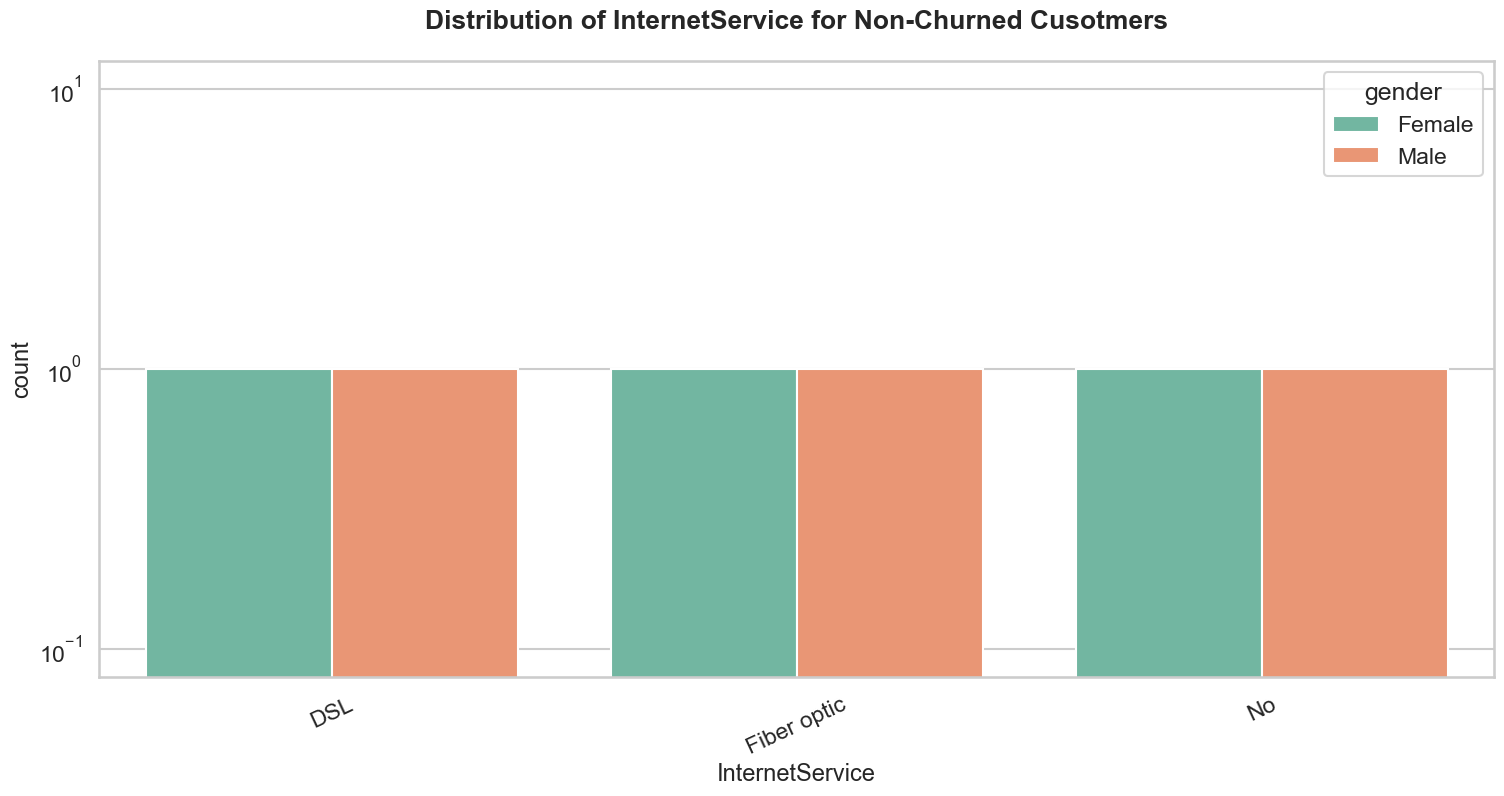

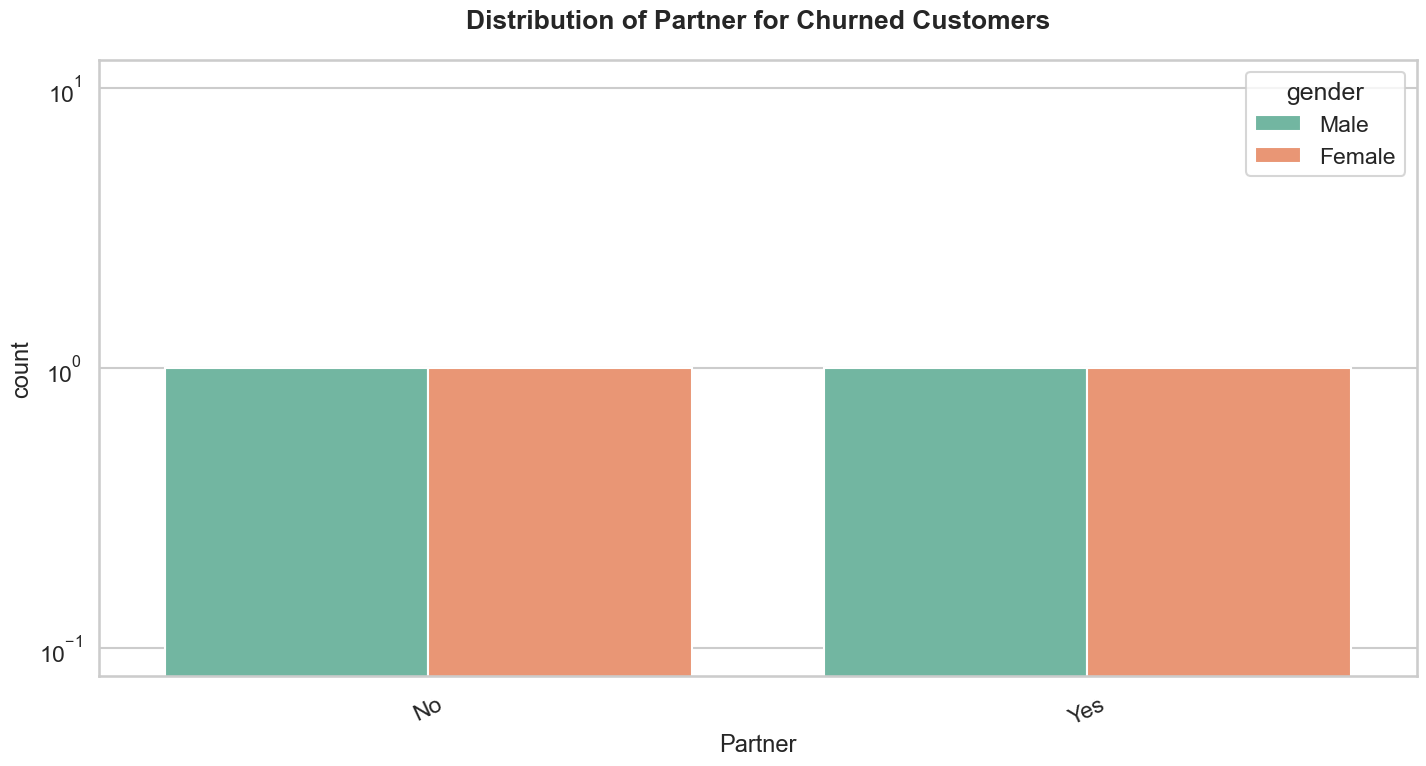

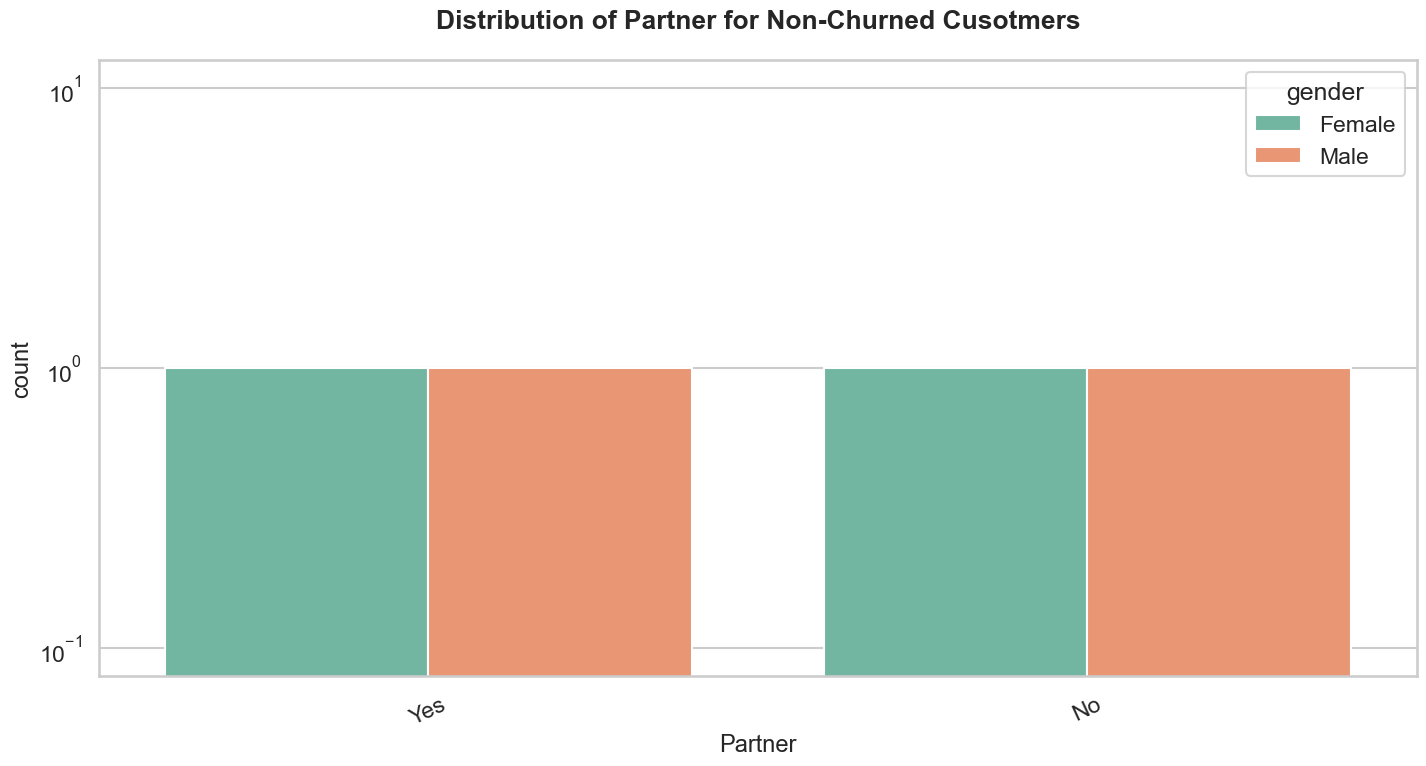

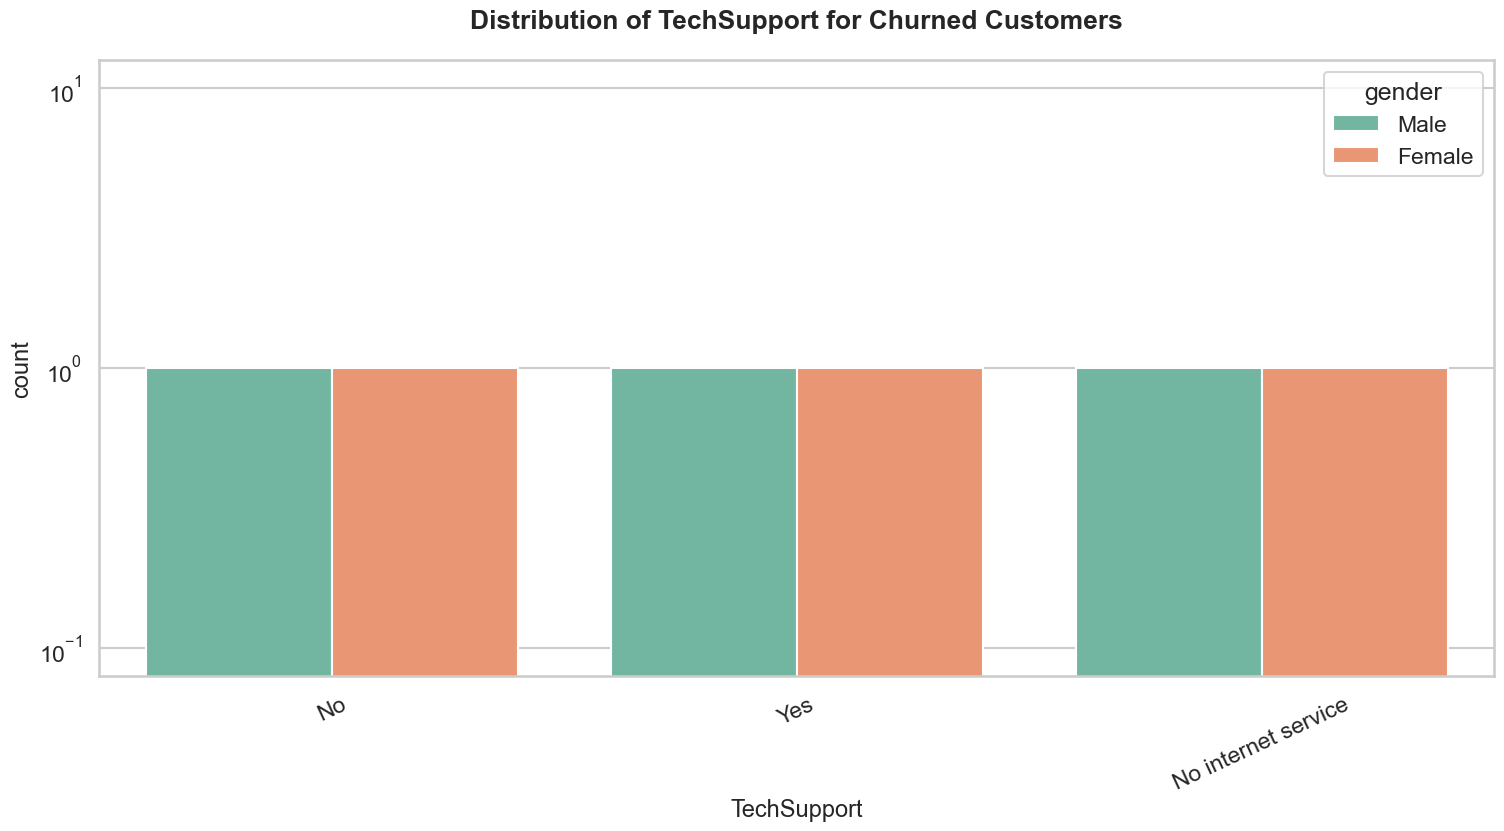

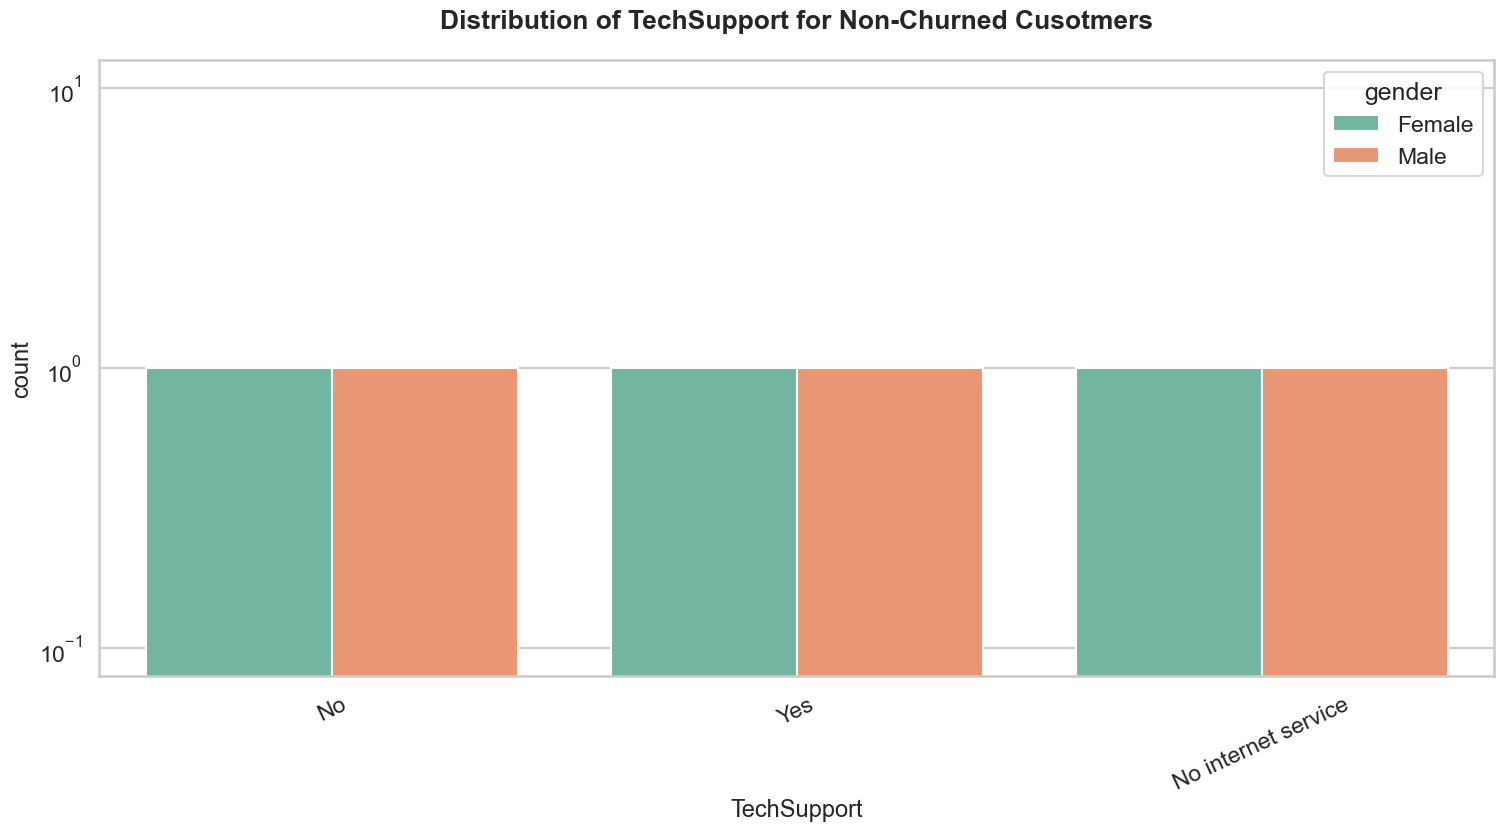

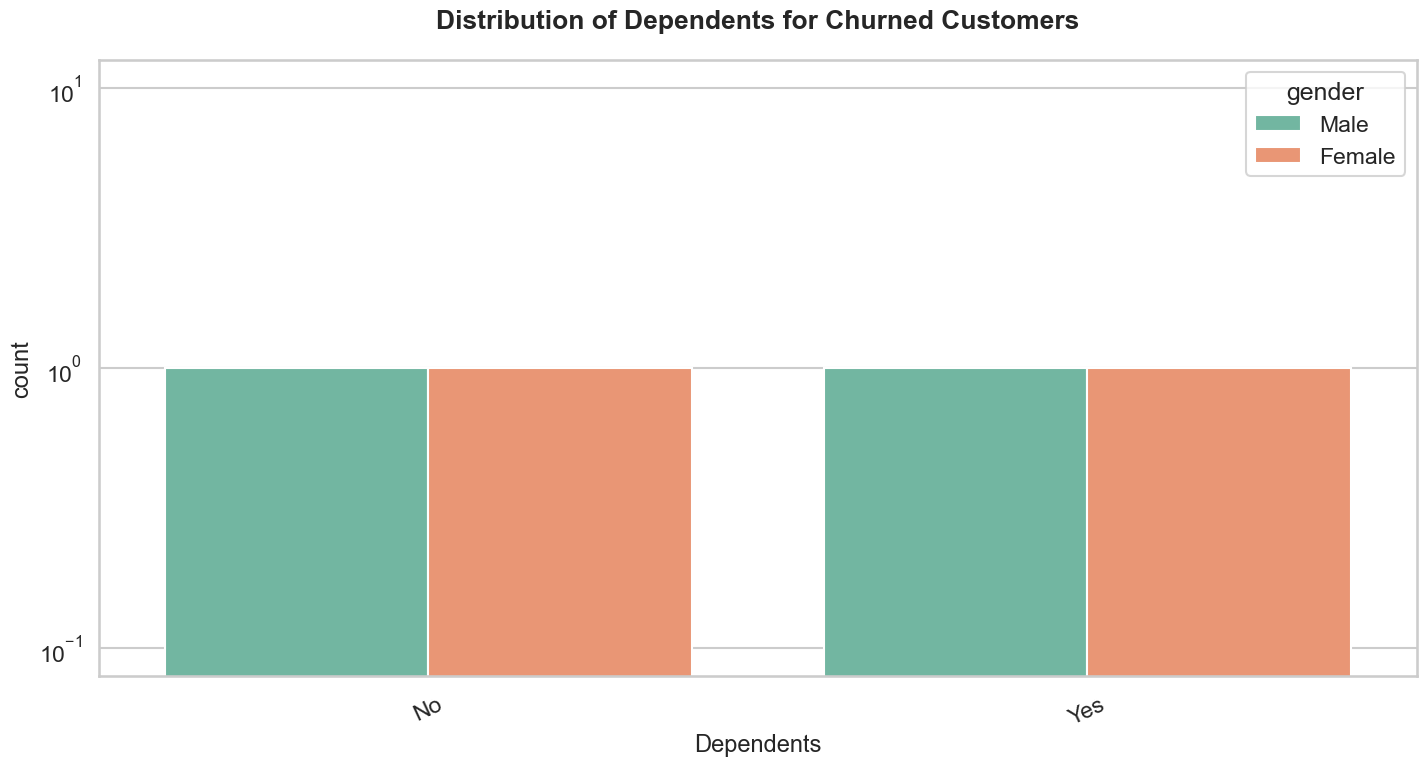

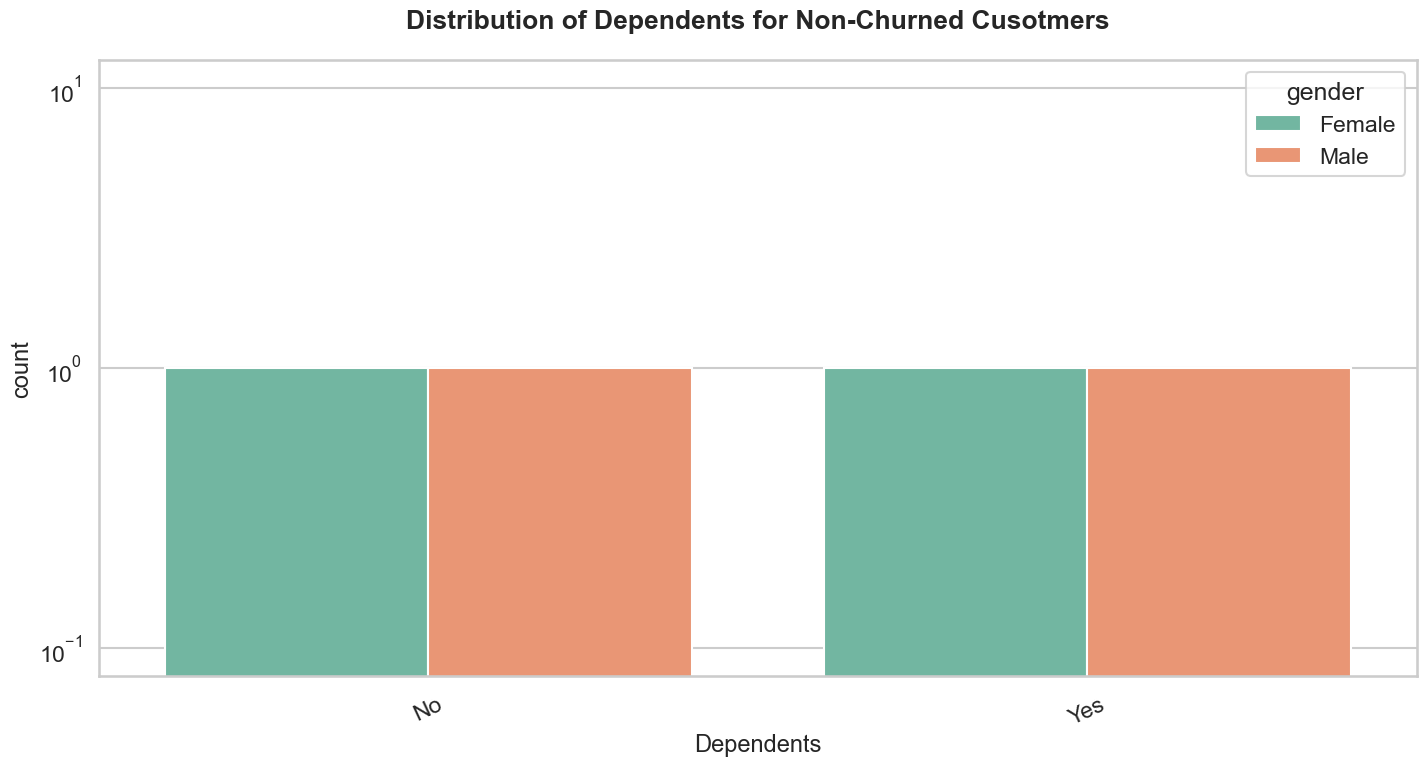

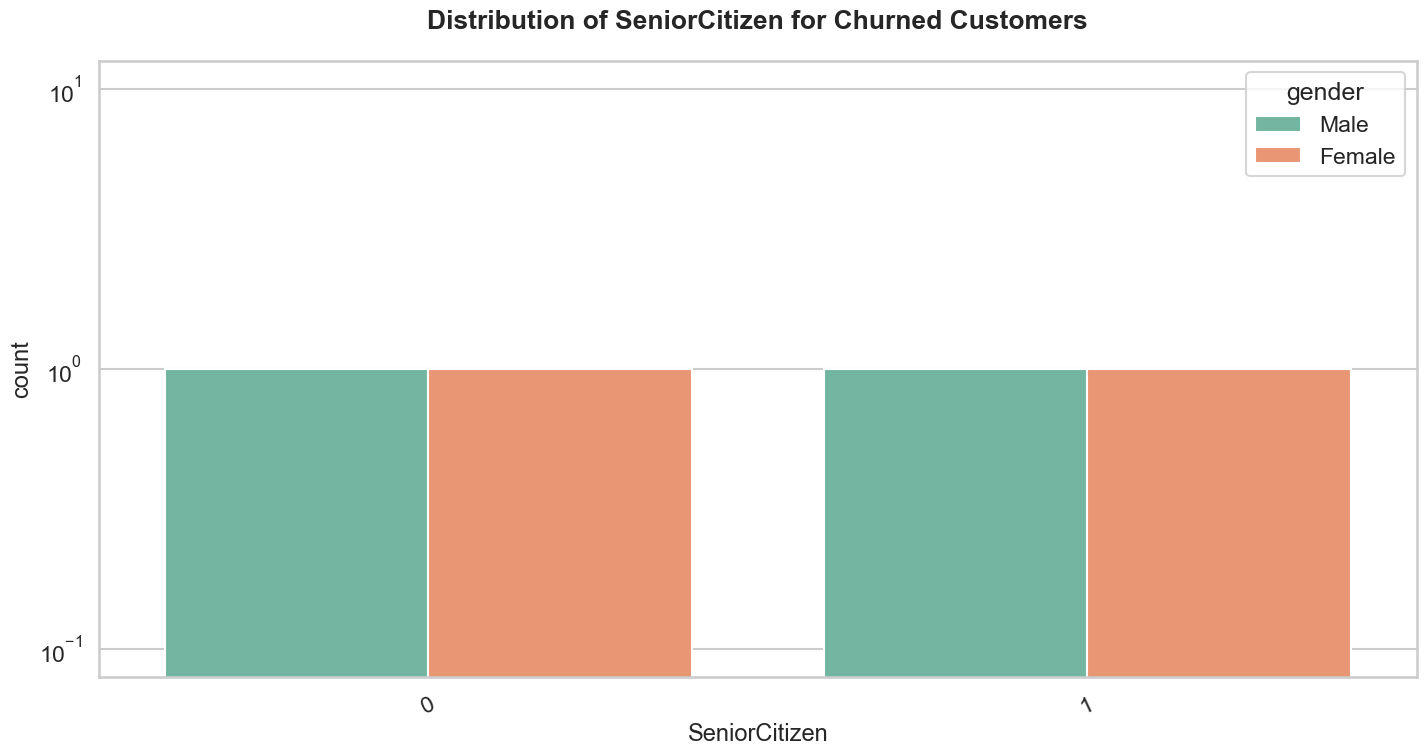

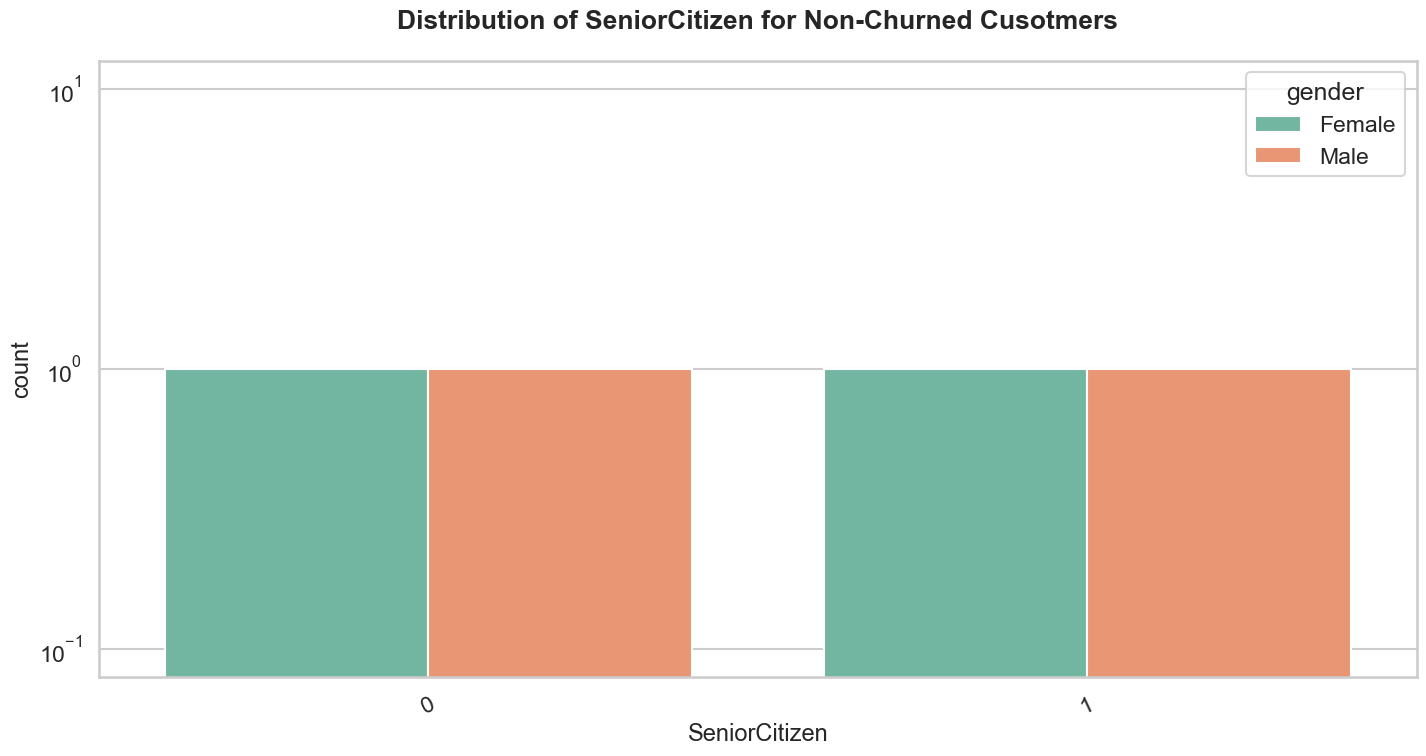

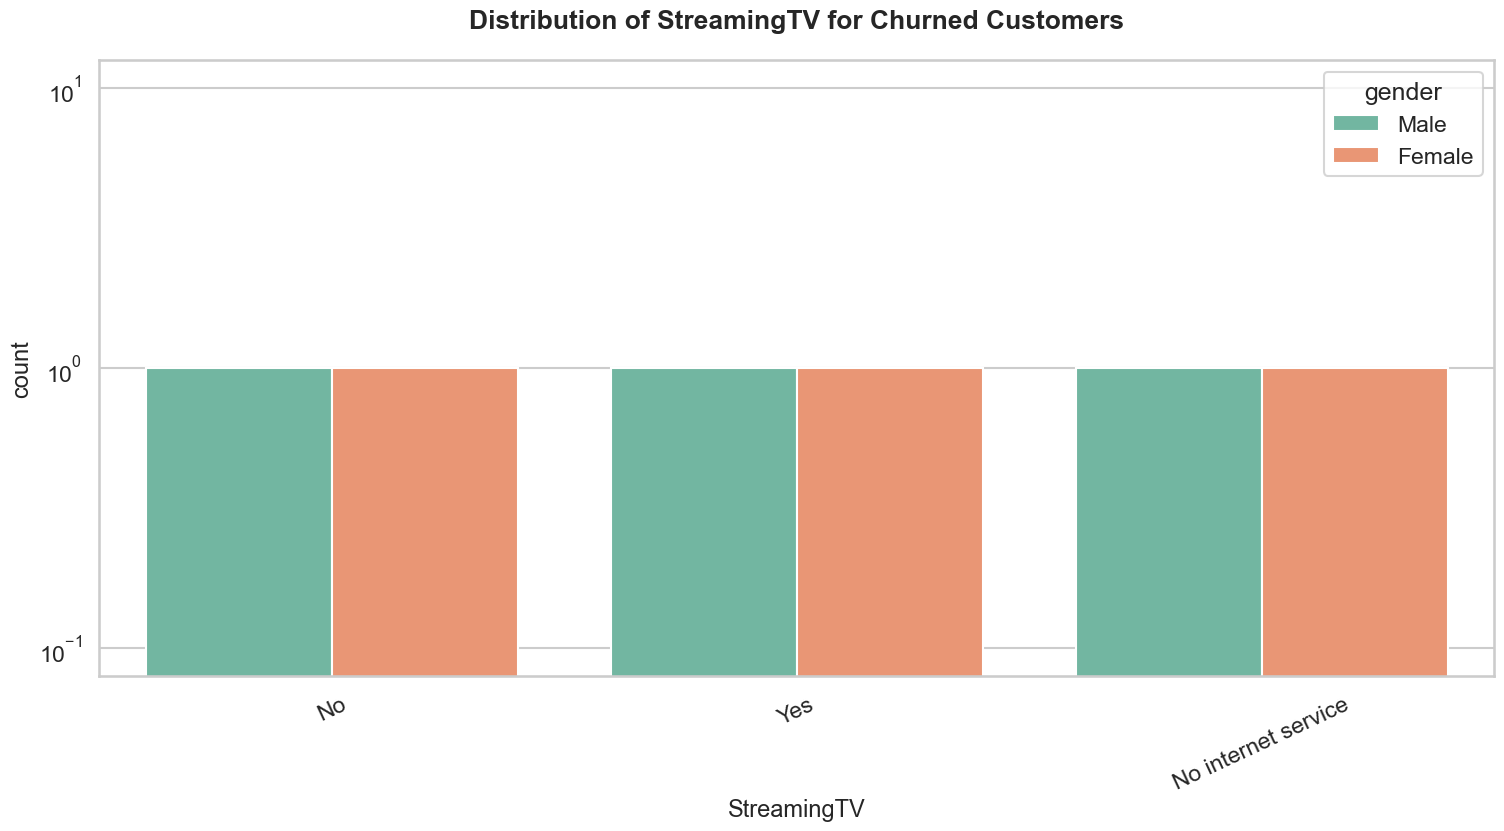

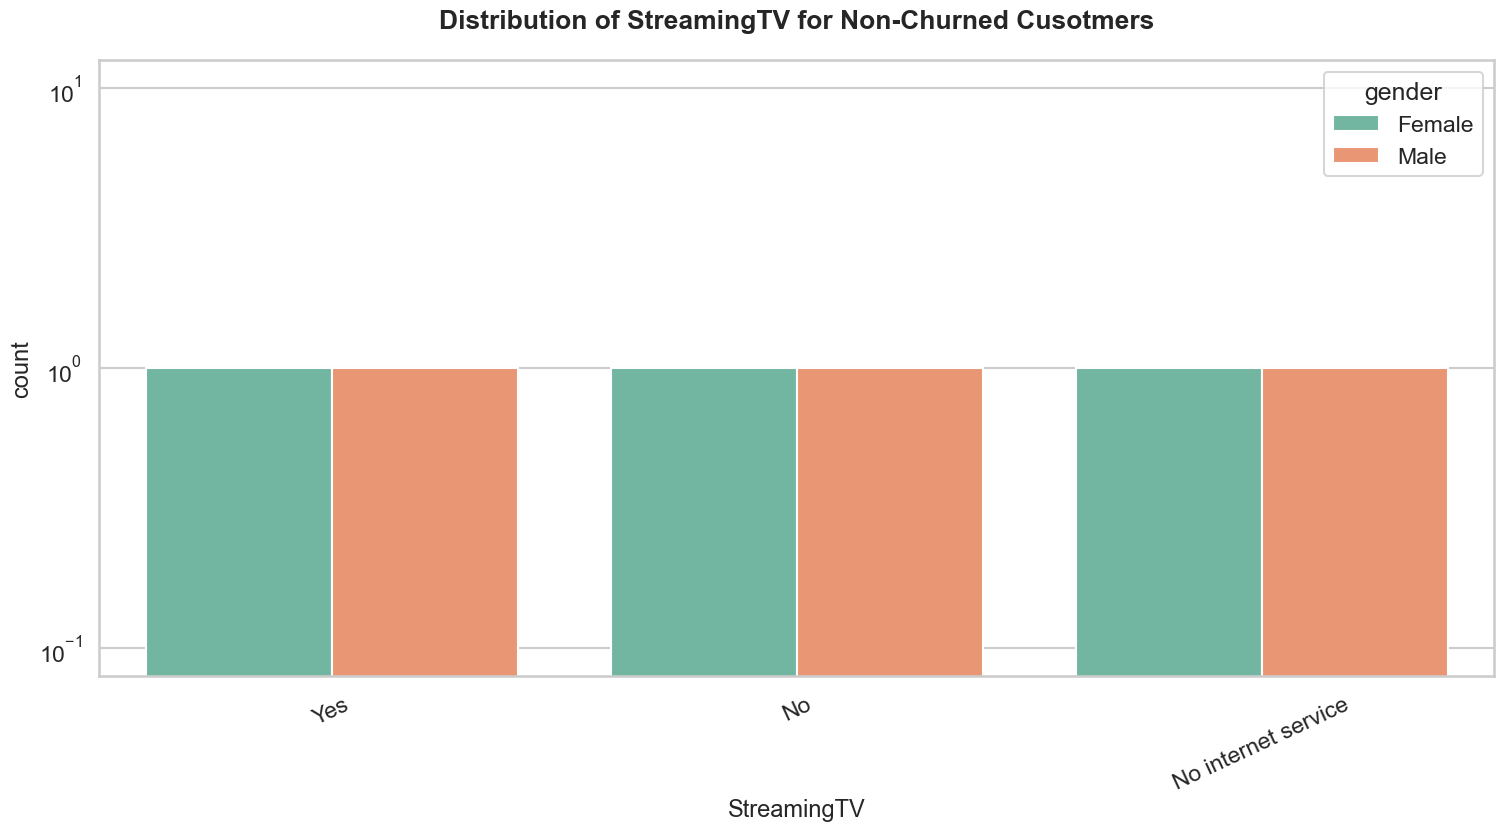

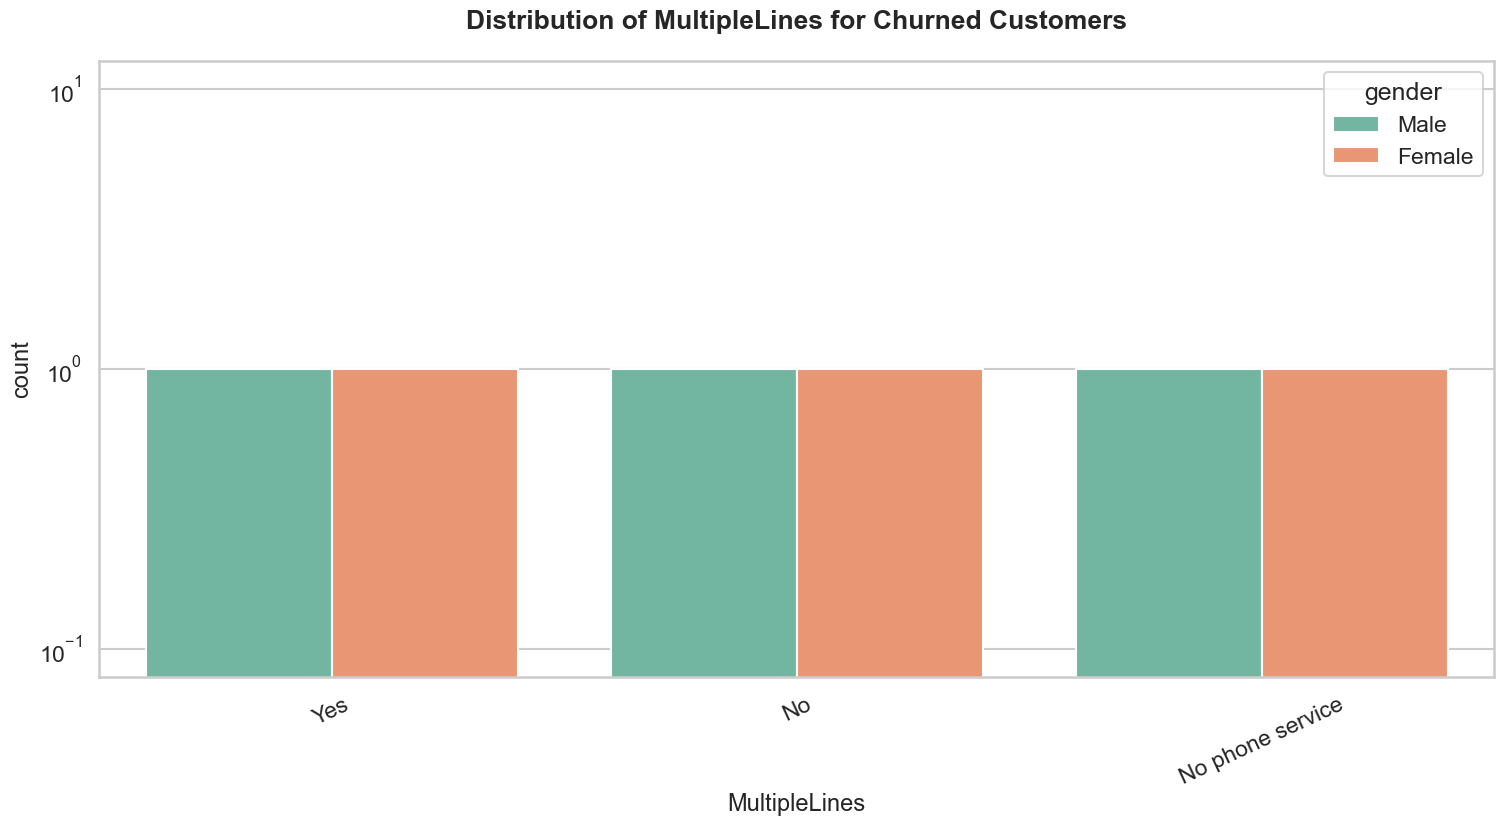

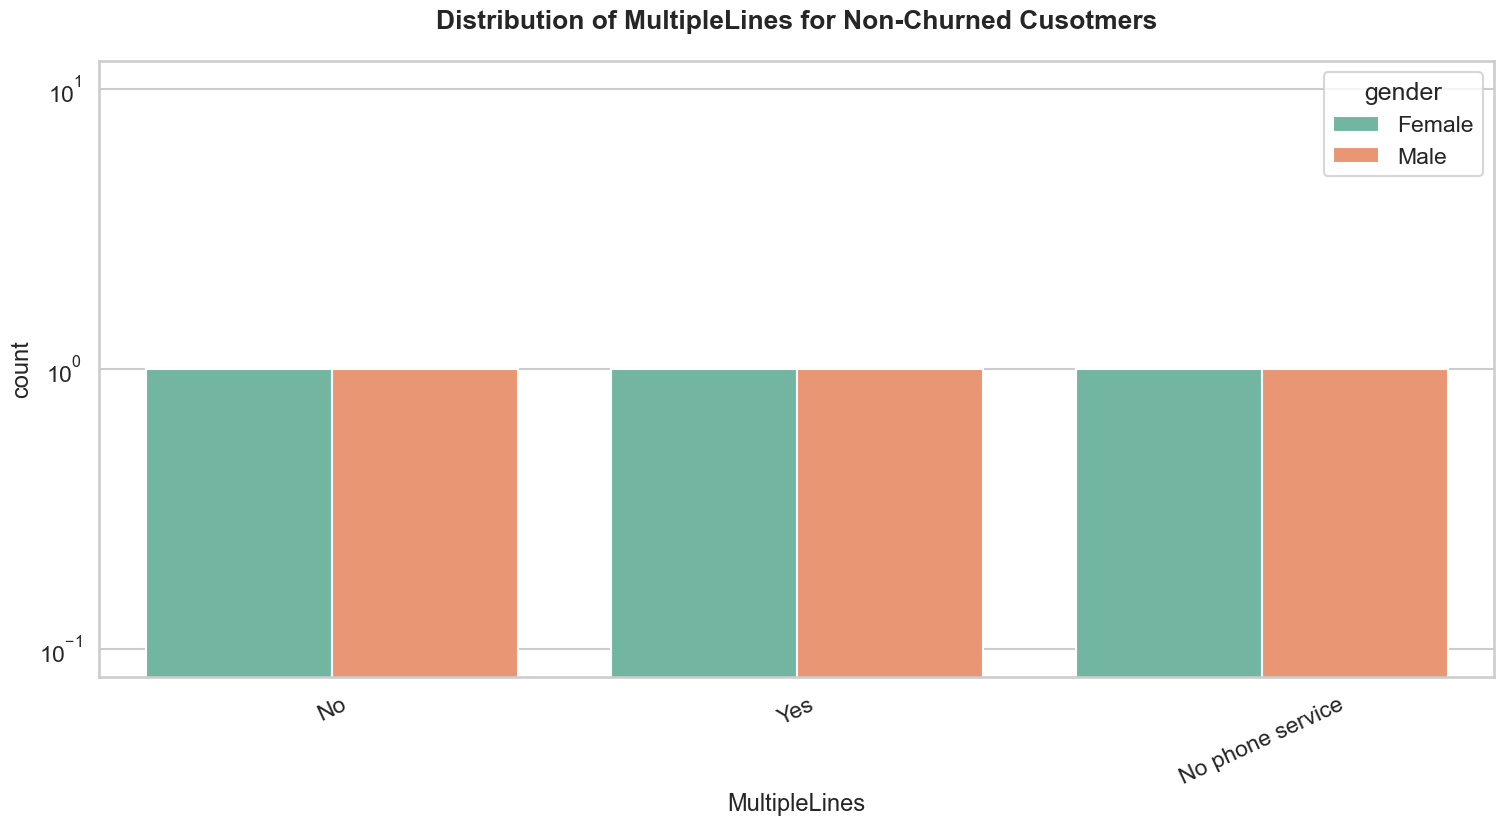

In [26]:
cat_features = ['PaymentMethod', 'Contract', 'InternetService', 'Partner', 'TechSupport', 'Dependents', 'SeniorCitizen', 'StreamingTV', 'MultipleLines']

for feature in cat_features:
    # plot for churned customers
    custom_plot(churn_yes, feature=feature, title=f'Distribution of {feature} for Churned Customers', hue='gender')
    print("\n")
    # plot for non churned customers
    custom_plot(churn_no, feature=feature, title=f'Distribution of {feature} for Non-Churned Cusotmers', hue='gender')
    print("\n")

### Bivariate Analysis

In [27]:
def plot_stacked_bar(feature):
    crosstab = pd.crosstab(df[feature], df['Churn'])
    crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
    crosstab_norm.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f"Stacked Bar Chart for {feature}", fontweight='bold')
    plt.ylabel('Proportion')
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=25)
    plt.show()

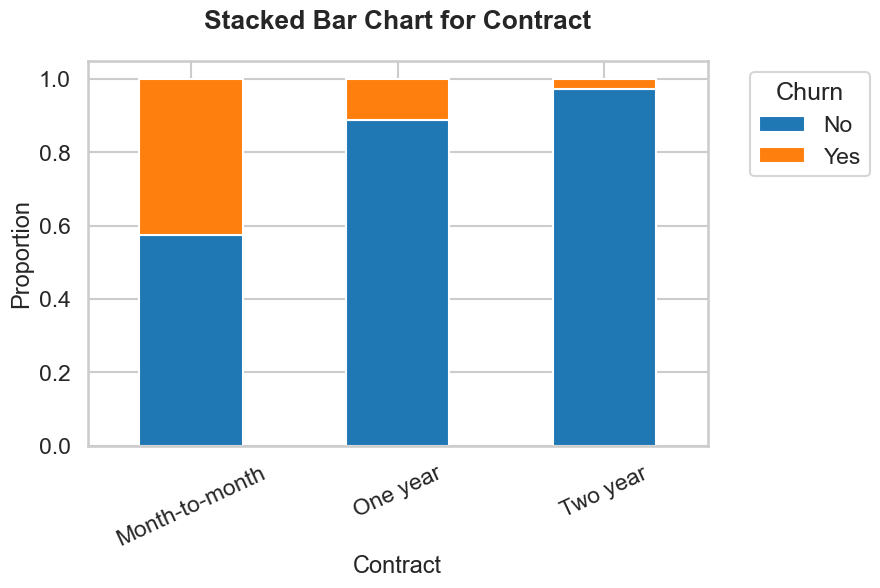

In [28]:
plot_stacked_bar('Contract')


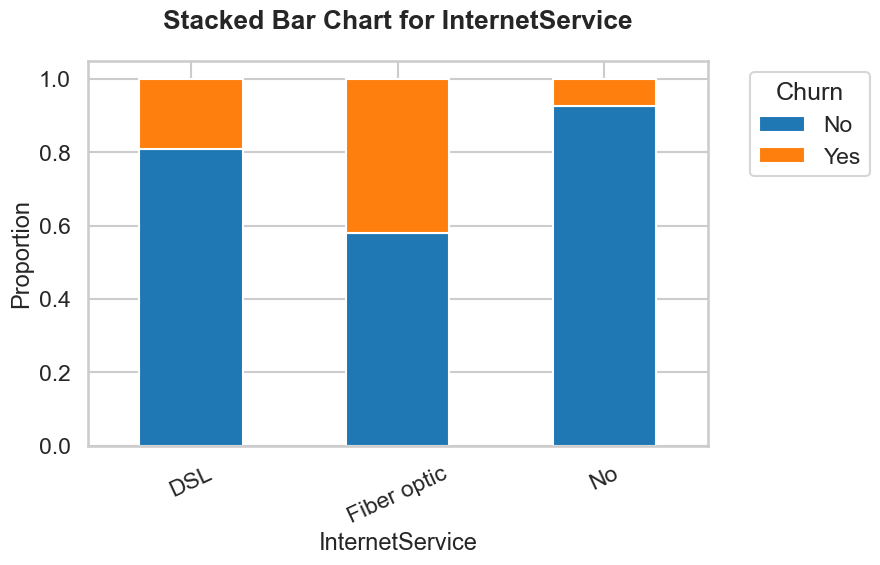

In [29]:
plot_stacked_bar('InternetService')


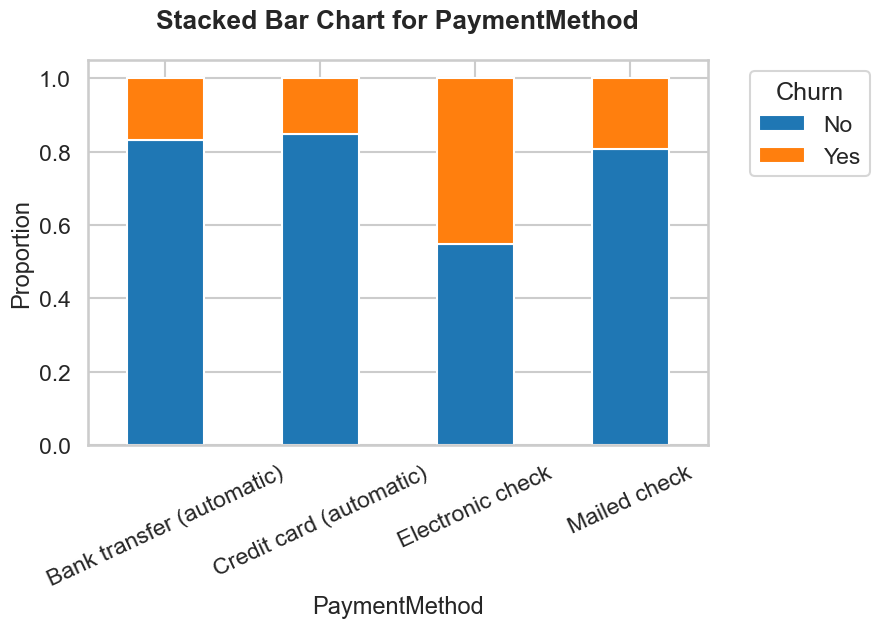

In [30]:
plot_stacked_bar('PaymentMethod')


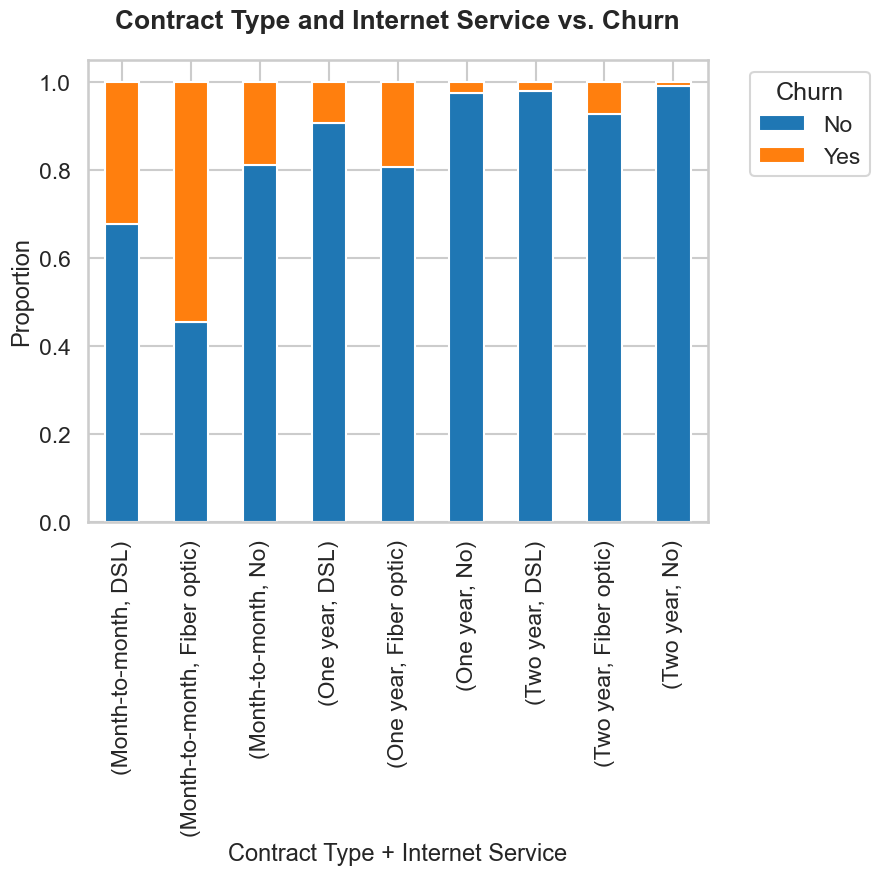

In [31]:
# contract + internet service vs churn
ci = pd.crosstab(index=[df['Contract'], df['InternetService']], columns=df['Churn'], normalize='index')
ci.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Contract Type and Internet Service vs. Churn", fontweight='bold')
plt.xlabel("Contract Type + Internet Service")
plt.ylabel("Proportion")
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


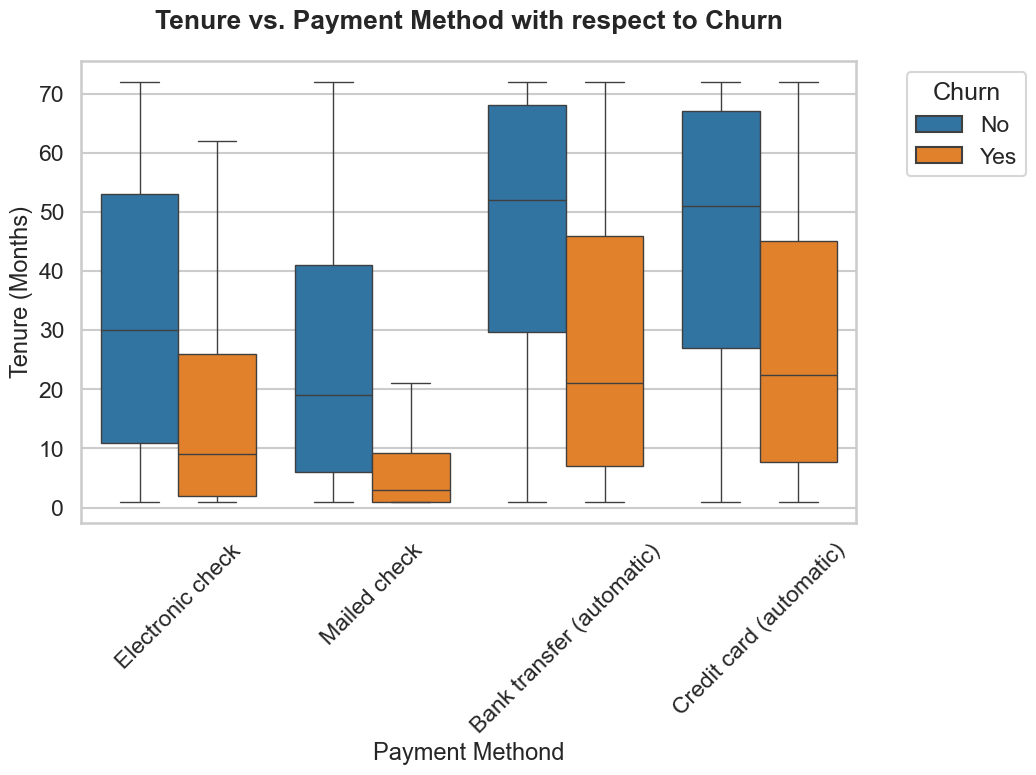

In [32]:
# tenure + payment method vs churn
plt.figure(figsize=(10,6))
sns.boxplot(df, x='PaymentMethod', y='tenure', hue='Churn', showfliers=False)
plt.title('Tenure vs. Payment Method with respect to Churn', fontweight='bold')
plt.xlabel('Payment Methond')
plt.ylabel('Tenure (Months)')
plt.xticks(rotation=45)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

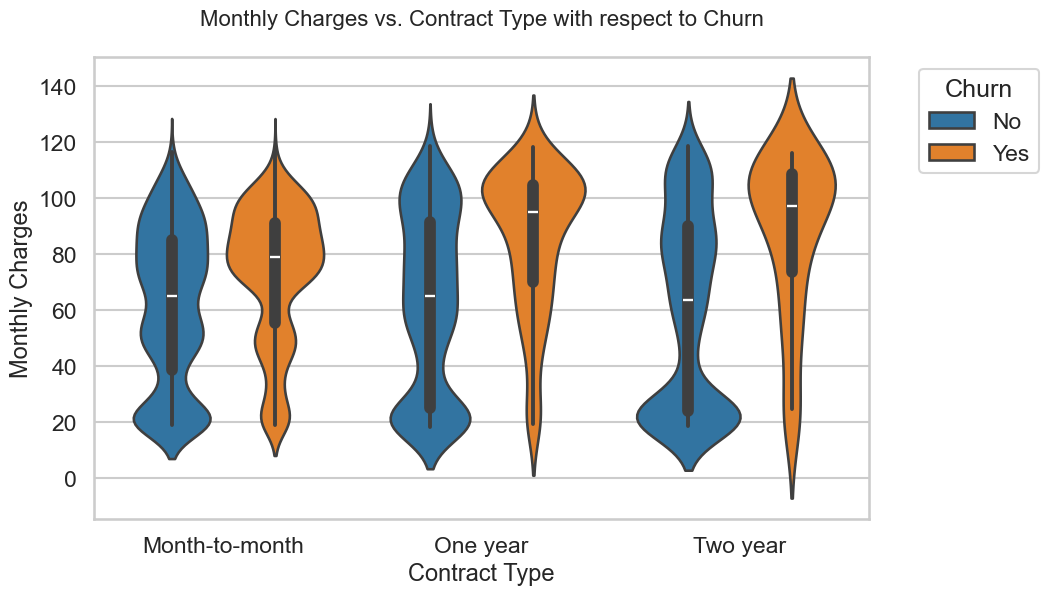

In [33]:
# monthly charges + contract vs. churn
plt.figure(figsize=(10,6))
sns.violinplot(df, x='Contract', y='MonthlyCharges', hue="Churn")
plt.title('Monthly Charges vs. Contract Type with respect to Churn', fontsize=16)
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.legend(title= "Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

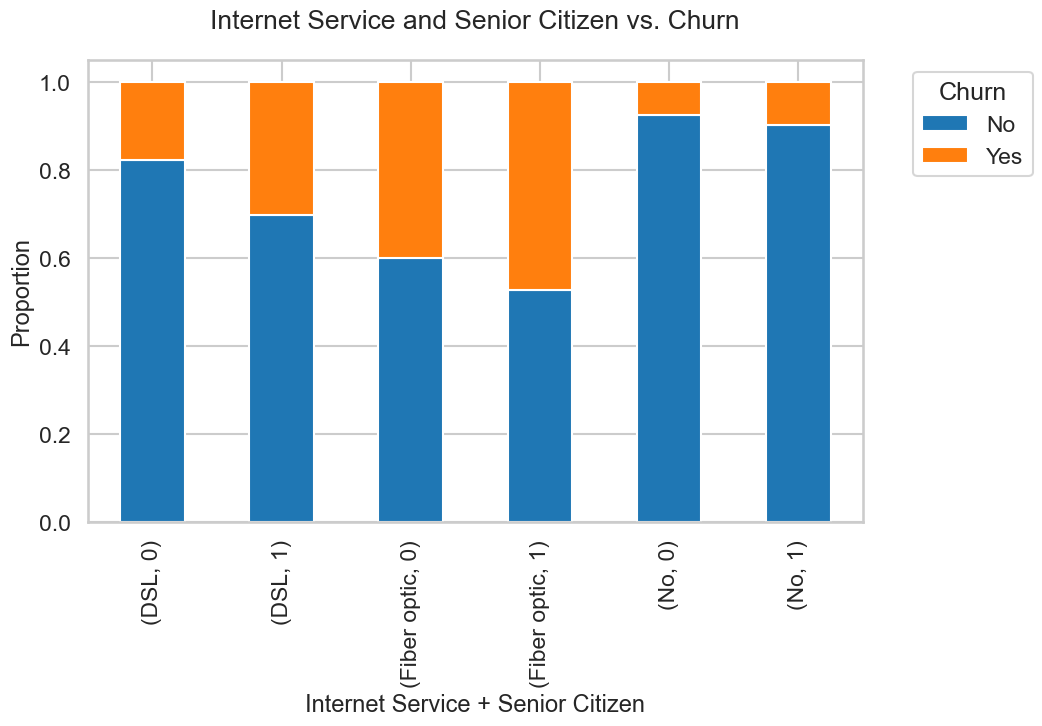

In [34]:
# Internet Service + Senior Citizen vs Churn
its = pd.crosstab(index=[df['InternetService'], df["SeniorCitizen"]], columns=df['Churn'], normalize='index')
its.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Internet Service and Senior Citizen vs. Churn")
plt.xlabel('Internet Service + Senior Citizen')
plt.ylabel("Proportion")
plt.legend(title="Churn", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [35]:
temp = df.copy()
temp['Churn'] = np.where(temp.Churn == 'Yes', 1, 0)
temp = temp.drop('tenure', axis=1)

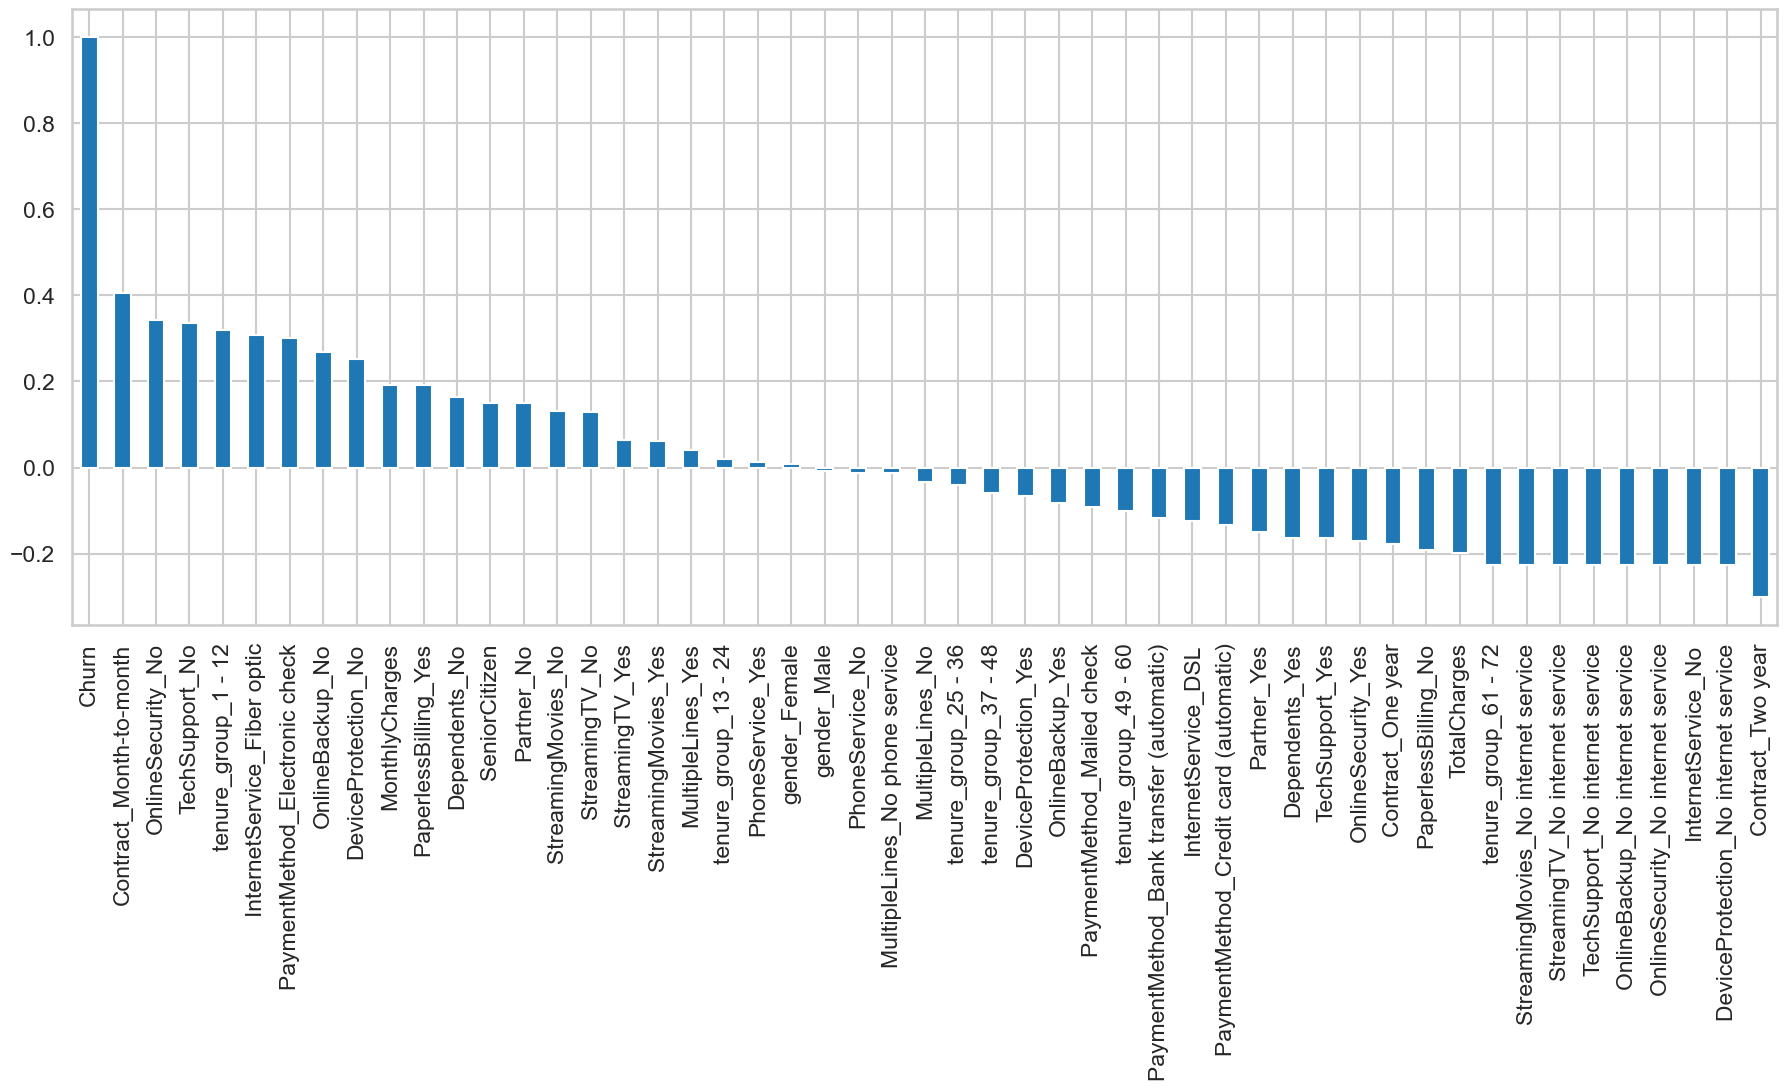

In [36]:
plt.figure(figsize=(22, 8))
temp1 = pd.get_dummies(temp, dtype=np.int32)
temp1.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

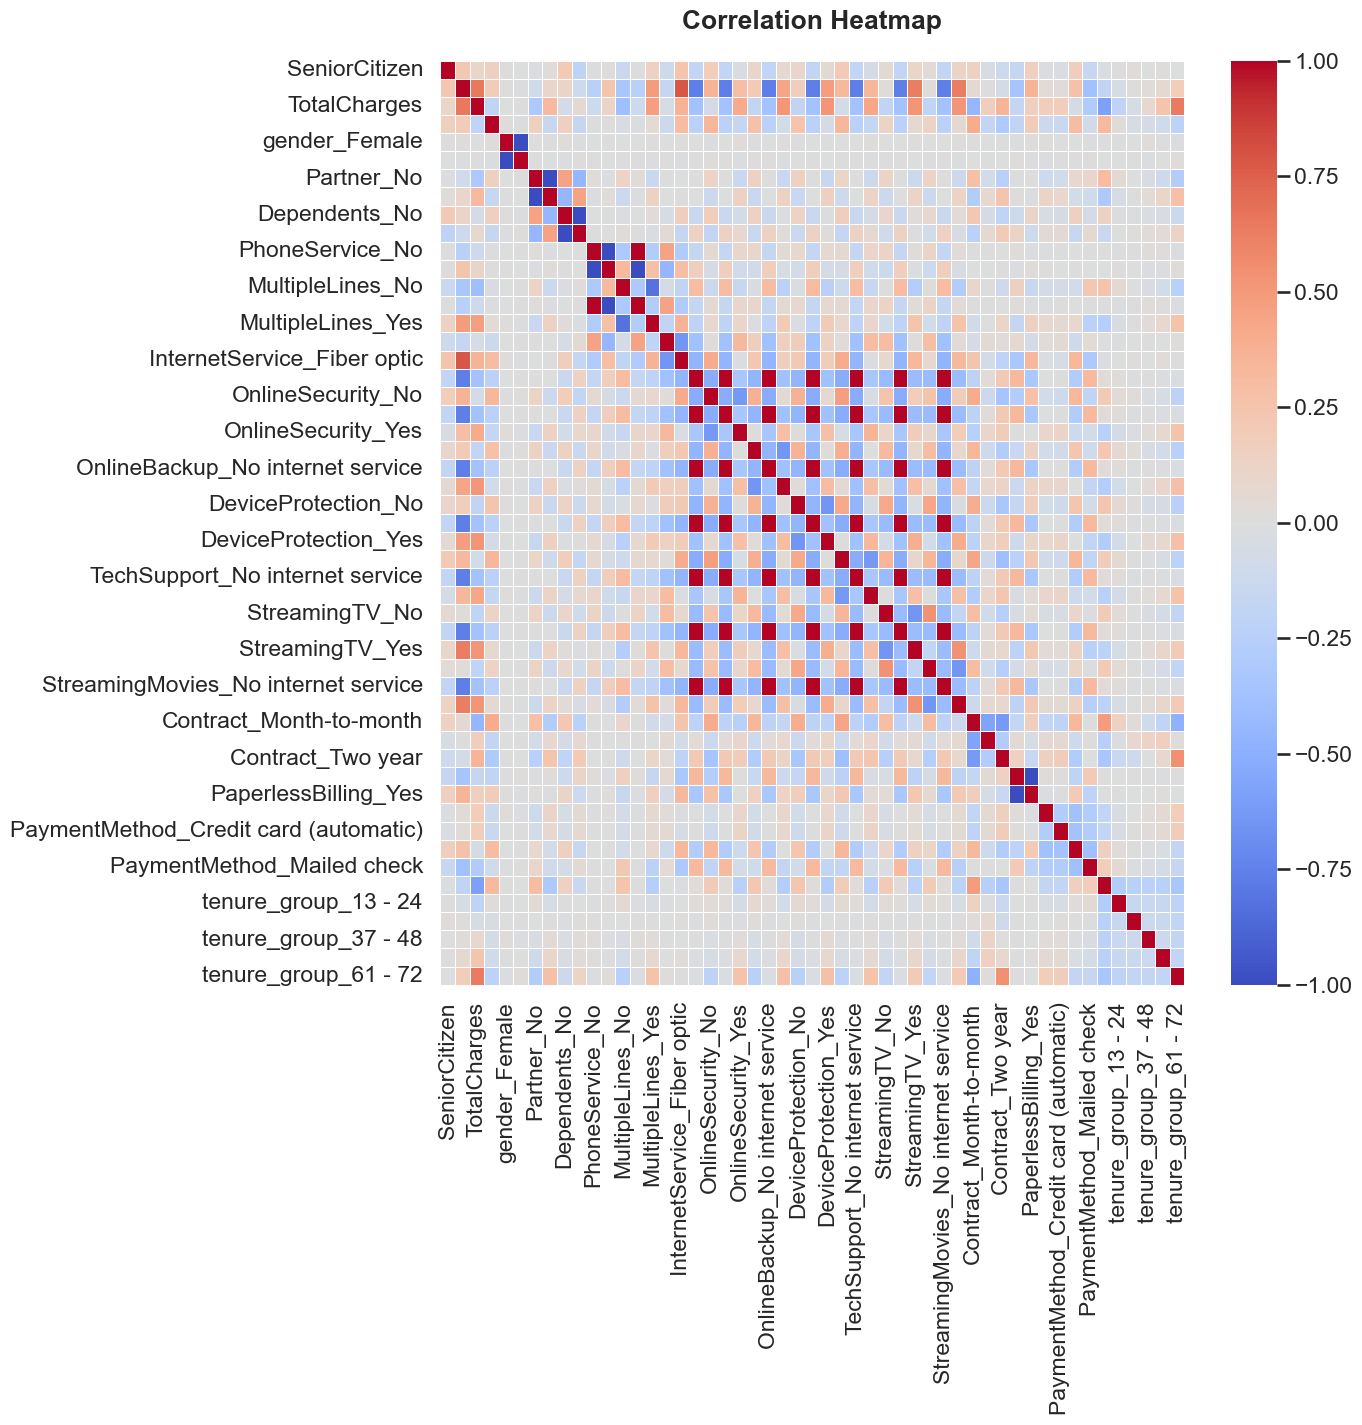

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(temp1.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()